In [194]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

In [4]:
import smart
import coronagraph as cg

In [5]:
sys.path.insert(1, "../scripts")

import spectroscopy

In [6]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

In [7]:
drm1 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.1, 
    architecture = "A", 
    telescope_mods = {}
)

In [8]:
print(drm1.NBIAS)
print(drm1.Ndraw)

53
5


In [9]:
drm1.generate_exptime_table()

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:290: RuntimeWarning: divide by zero encountered in true_divide
  Csig = self.Cratio/SNRt
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:291: RuntimeWarning: divide by zero encountered in true_divide
  Asig = self.A/SNRt
../scripts/spectroscopy.py:1019: RuntimeWarning: divide by zero encountered in double_scalars
  t_snr = (wantsnr**2 - intercept) / slope
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:287: RuntimeWarning: invalid value encountered in multiply
  SNRt  = self.cp * Dt / np.sqrt((self.cp + roll_factor*self.cb) * 

In [10]:
drm1.exptime_table.head(n=10)

,HIP,type,d [pc],UV 1,UV 2,UV 3,UV 4,UV 5,UV 6,UV 7,...,vis 8,NIR 1,NIR 2,NIR 3,NIR 4,NIR 5,NIR 6,NIR 7,NIR 8,Spec. Completeness
0,8102,G8V,3.65017,nan,nan,nan,15.542126976862296,6.588144491022855,3.279371683941422,2.221020669847736,...,1.8541639698794188,1.611452488081181,1.5225944412845132,1.602035479461935,1.8692707947056615,2.276742632935094,2.941784605799324,5.0509366219670975,13.452815686557424,0.9640217391304348
1,91772,K5,3.49174,59158.4058525243,4439.310171168659,452.81895932910766,73.81784320840822,18.886175430686315,6.796583106111017,3.707352497309677,...,1.063957962126806,1.0099356012113438,0.8931109161010925,0.8877073054221175,0.9846165030696623,1.1441991927945572,1.414723547570182,2.3243819178513045,5.9781192337226425,1.0
2,85523,K5,4.5405,167597.91961136842,12280.34473459389,1174.1244808489816,170.86308131332925,38.79177247547821,12.878813734486492,6.790106174426641,...,1.9657383881489363,2.3876459703926267,2.1245951795850258,2.141448612648874,2.4228934300880707,2.874240419639238,3.6345816385413174,6.213286463725507,16.63884533592044,1.0
3,99461,K2V,6.01504,54549.066535451726,5349.320230546143,685.5083574641627,131.85744149802818,37.49685705923282,14.589118289842126,8.59975432661335,...,4.638476714483282,7.005841655838477,6.5224735832990675,6.886075764336786,8.165814873115796,10.125022323922195,13.36269423899483,24.10892572655181,67.62199870844715,1.0
4,61317,G0V,8.43953,2146.94748001804,519.0610467670482,163.11678513771338,66.22424523277444,32.19525662325254,18.068776341928626,13.690170906987746,...,25.88118852209845,40.3385047335319,41.09744014185214,47.10623526602394,60.291465282097164,80.20084158604915,113.01773167624258,218.65794394054268,647.408891961948,1.0
5,12114,K3V,7.1803,219840.1213401144,19230.1178056112,2122.8441034990747,338.80954469060674,80.21961898816015,27.255727592235644,14.930104375704552,...,6.93704366140513,12.814012908658647,11.828915864817956,12.442934904589432,14.748473485576985,18.28683558464104,24.151771898183412,nan,nan,0.8758483695652175
6,22449,F6V,8.06842,nan,nan,116.92149333837006,56.50200387661321,30.823205450526682,18.787346387159975,15.121706514968436,...,37.06987645273815,45.99721342668068,47.46674791197353,54.79040718304106,70.37986872000393,93.96529148539751,132.85002492415902,256.512909826718,757.1041821502606,0.9771739130434782
7,57939,G8Vp,9.09174,33948.48535748806,4407.452454719293,734.1361543505062,176.17292372908912,59.036975502098805,25.86818806325754,16.782019247295278,...,17.628435624879405,36.73249909474582,35.860572108134484,39.73702688024692,49.449474892096696,64.09441246963141,88.20048031096688,167.34278892907972,nan,0.9721288586956522
8,56997,G8Vvar,9.61169,42205.851017264664,5436.110090447838,891.2917787600655,209.40103672444195,68.83005575542029,29.77735654930697,19.22714325317537,...,20.662596857025566,45.244992361211494,44.220218412341524,49.08314214343799,61.20086394546683,79.46820305798035,109.54238240422295,nan,nan,0.8758483695652175
9,113283,K4Vp,7.60919,569419.4272315712,45097.0411022191,4466.63631335781,629.5297066507917,131.15389299392248,40.1158420127269,20.589512158630086,...,7.799900790343847,15.136972151045164,13.791735879017118,14.351667736411402,16.854741970006938,20.72562931439047,nan,nan,nan,0.7883206521739131


In [11]:
np.random.seed(seed = 3)
t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm1.run_hec_drm(Ndraw = drm1.Ndraw, iremove = [], wantexp_days=drm1.wantexp)

HIP23693 - F7V - 11.65pc
    - 100.0% Complete Spectrum : 230.18 days
    - UV Spectrum : 185.36 days
    - Optical Spectrum : 33.53 days
    - NIR Spectrum : 230.18 days
    - Overhead 23.73 days
HIP95447 - G8IVvar - 15.18pc
    - 100.0% Complete Spectrum : 13988.28 days
    - UV Spectrum : 13988.28 days
    - Optical Spectrum : 130.61 days
    - NIR Spectrum : 334.87 days
    - Overhead 1399.55 days
HIP32984 - K3V - 8.71pc
    - 70.9% Complete Spectrum : 21685.95 days
    - UV Spectrum : 21685.95 days
    - Optical Spectrum : 7.36 days
    - NIR Spectrum : 4.47 days
    - Overhead 2169.21 days
HIP36439 - F6V - 20.24pc
    - 87.6% Complete Spectrum : 971.45 days
    - UV Spectrum : 971.45 days
    - Optical Spectrum : 171.24 days
    - NIR Spectrum : 609.56 days
    - Overhead 97.81 days
HIP57507 - G5V - 17.76pc
    - 51.1% Complete Spectrum : 7534.00 days
    - UV Spectrum : 7534.00 days
    - Optical Spectrum : 72.48 days
    - NIR Spectrum : 22.48 days
    - Overhead 753.94 days
--

## Test for sensitivity to coronagraph raw contrast

In [10]:
contrasts = np.array([1e-10, 5e-10, 1e-9, 5e-9])
iremove = [0,1,13]

Xdraw = 2000
bins = 25

np.random.seed(seed = None)

t_totx = np.zeros((len(contrasts), Xdraw))
c_totx = np.zeros((len(contrasts), Xdraw))

# Loop over contrasts
for i in range(len(contrasts)):

    # Create DRM
    drmx = spectroscopy.HEC_DRM(
        wantSNR = 8.5, 
        wantexp = 365., 
        Ahr_flat = 0.20,
        eta_int = 0.1, 
        bandwidth = 0.2, 
        architecture = "A", 
        telescope_mods = {"contrast" : contrasts[i]}
    )

    # Calculate table of exposure times
    drmx.generate_exptime_table()

    # Run DRM for Xdraw number of times
    for x in range(Xdraw):
        t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = drmx.Ndraw, 
                                                                                                       verbose = False, 
                                                                                                       iremove = iremove, 
                                                                                                       wantexp_days=drmx.wantexp)
        t_totx[i,x] = np.sum(t_tot_sort)
        c_totx[i,x] = count_in_texp

$4^{+1}_{-0}$ spectra in 365 days
$4^{+0}_{-1}$ spectra in 365 days
$3^{+1}_{-1}$ spectra in 365 days
$1^{+1}_{-0}$ spectra in 365 days


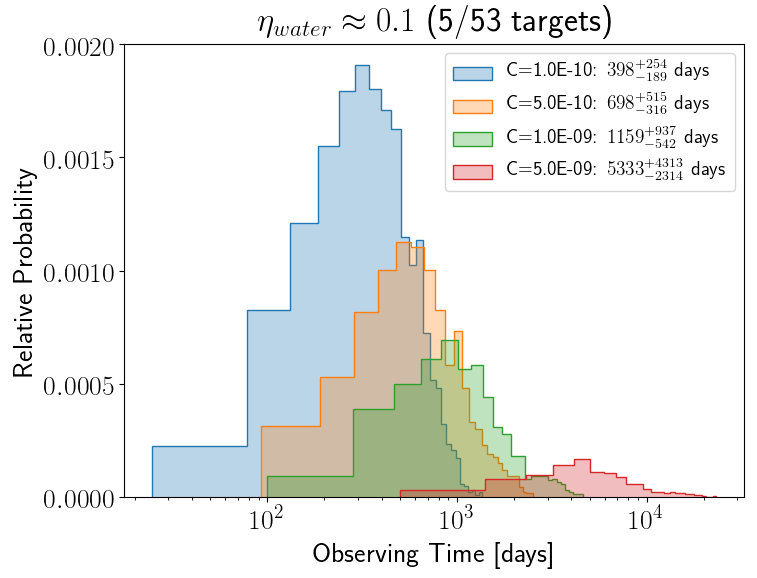

In [256]:
# Plot exposure time hist
fig, ax = plt.subplots(1, figsize = (8,6))
ax.set_xlabel("Observing Time [days]")
ax.set_ylabel("Relative Probability")
ax.set_title(r"$\eta_{water} \approx %.1f $ (%i/%i targets)" %(float(drmx.Ndraw)/float(drmx.NBIAS), drmx.Ndraw, drmx.NBIAS))

labels = []
handles = []

for i in range(len(contrasts)):
    
    label = "C=%.1E" %contrasts[i]
    color = "C%i" %i
    ctime_sum = t_totx[i,:] / 24.
    q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(ctime_sum)
    result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
    h = ax.hist(ctime_sum, bins = bins, alpha = .3, color = color, normed=True);
    h2 = ax.hist(ctime_sum, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
    handles.append((h[2][0], h2[2][0]))
    #ax.axvline(q_50, color = "w", ls = "dashed")
    #ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
    labels.append(label+": %s days" %result)
    
    q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_totx[i,:])
    print("$%i^{+%i}_{-%i}$ spectra in %i days" %(q_50, q_p, q_m, drmx.wantexp))
    
ax.set_xscale("log")
ax.legend(handles, labels, fontsize = 14)

fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_contrast_sensitivity_A.pdf", bbox_inches = "tight")

## Remake spectrum plot

In [11]:
# Create LUVOIR-A DRM
drmA = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.1, 
    architecture = "A", 
    telescope_mods = {}
)

# Calculate table of exposure times
drmA.generate_exptime_table()

In [12]:
# Create LUVOIR-B DRM
drmB = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.1, 
    architecture = "B", 
    telescope_mods = {}
)

# Calculate table of exposure times
drmB.generate_exptime_table()

In [13]:
# No Bands Removed
iremove = []
Xdraw = 2000

# Set RNG seed for random sampling
np.random.seed(seed = None)

t_totxA = np.zeros(Xdraw)
c_totxA = np.zeros(Xdraw)
countxA = np.zeros(Xdraw)
tpbpcxA = np.zeros((Xdraw, drmA.Ndraw, len(drmA.bp_names)))

t_totxB = np.zeros(Xdraw)
c_totxB = np.zeros(Xdraw)
countxB = np.zeros(Xdraw)
tpbpcxB = np.zeros((Xdraw, drmB.Ndraw, len(drmB.bp_names)))

# Run DRMs for Xdraw number of times
for x in range(Xdraw):
    
    t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmA.run_hec_drm(Ndraw=drmA.Ndraw, 
                                                                                                   verbose=False, 
                                                                                                   iremove=iremove, 
                                                                                                   wantexp_days=drmA.wantexp)
    t_totxA[x] = np.sum(t_tot_sort)
    c_totxA[x] = np.mean(c_tot_sort)
    countxA[x] = count_in_texp
    tpbpcxA[x,:,:] = tpbpcs_draws
    
    t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmB.run_hec_drm(Ndraw=drmB.Ndraw, 
                                                                                                   verbose=False, 
                                                                                                   iremove=iremove, 
                                                                                                   wantexp_days=drmB.wantexp)
    t_totxB[x] = np.sum(t_tot_sort)
    c_totxB[x] = np.mean(c_tot_sort)
    countxB[x] = count_in_texp
    tpbpcxB[x,:,:] = tpbpcs_draws

In [14]:
# Set planet and star parameters for an Earth-Sun analog at 5pc
drmA.cn.planet.distance = 6.0
drmA.cn.planet.a = 1.0
drmA.cn.star.Rs = 1.0
drmA.cn.star.Teff = 5780.

"""
wantSNR_grid = np.array([wantSNR for i in range(len(bp_names))])
wantSNR_grid[0] = 1.0
wantSNR_grid[1] = 1.0
"""

output = drmA.complete_spectrum_time()

spectrum = output[2]

In [15]:
# Sum to get average time per bandpass
tmpA = np.nansum(tpbpcxA, axis=1).T
tmpB = np.nansum(tpbpcxB, axis=1).T

In [16]:
drmA.bandpasses[drmA.bp_chan == 0]

array([[0.2       , 0.22      ],
       [0.22      , 0.242     ],
       [0.242     , 0.2662    ],
       [0.2662    , 0.29282   ],
       [0.29282   , 0.322102  ],
       [0.322102  , 0.3543122 ],
       [0.3543122 , 0.38974342],
       [0.38974342, 0.42871776],
       [0.42871776, 0.47158954],
       [0.47158954, 0.51874849],
       [0.51874849, 0.525     ]])

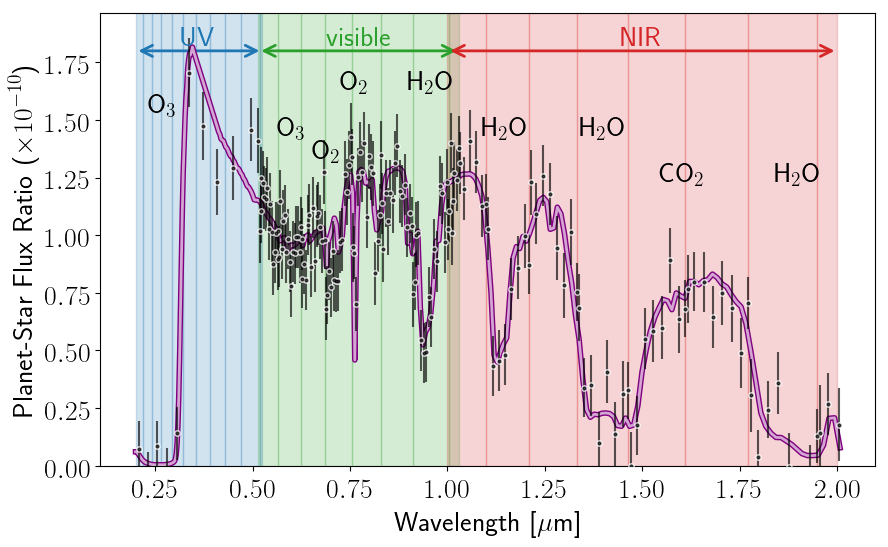

In [33]:
iremove = []
cc = ["C0", "C2", "C3"]
bp_names = drmA.bp_names
plot_boxes = False

fig, ax = plt.subplots(figsize = (10,6))

ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

# Label Molecules
ax.text(0.27, 1.55, "O$_3$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.6, 1.45, "O$_3$",   ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.69, 1.35, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.76, 1.65, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.96, 1.65, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.4, 1.45, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.9, 1.25, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.6, 1.25, "CO$_2$",  ha = "center", va = "center", color = "k", zorder = 130)

yloc = 1.8
lammin_inst = drmA.bandpasses[drmA.bp_chan == 0][0][0] 
lammax_inst = drmA.bandpasses[drmA.bp_chan == 0][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "UV"
color = cc[0]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmA.bandpasses[drmA.bp_chan == 1][0][0] 
lammax_inst = drmA.bandpasses[drmA.bp_chan == 1][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "visible"
color = cc[1]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmA.bandpasses[drmA.bp_chan == 2][0][0] 
lammax_inst = drmA.bandpasses[drmA.bp_chan == 2][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "NIR"
color = cc[2]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

if plot_boxes:

    ax2 = ax.twinx()
    
    """
    Xdraw = len(tpbpcs_draws_tots[0][0])

    # Transform quantities for boxplot
    tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
    for i in range(Xdraw):
        for j in range(tp):
            for k in range(len(tpbpcs_draws_tots[j])):
                tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
    """

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):
        
        data = []
        positions = []
        widths = []
        
        for j in range(len(bp_names[bp_chan == ichan])):
                
            data.append(tmp[icount,:])
            positions.append(np.mean(spectrum[0][icount]))
            widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
            color1 = cc[ichan]

            comp_str = "$%i \%%$" %(100.*frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                     ha = "center", va = "top", fontsize = 12, color = color1)

            icount += 1

        positions = np.array(positions)
        widths = np.array(widths)
        bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                          boxprops = {"color" : color1, "alpha" : 0.5}, 
                          whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                          capprops = {"color" : color1, "linewidth" : 0.0}, 
                          medianprops = {"color" : "w", "linewidth" : 2.0}, 
                          patch_artist=True, positions = positions, whis = [5, 95]); 

        for patch in bp1['boxes']:
            patch.set_facecolor(color1)

    ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = 0.0)

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xlim(0.1, 2.0)
    #ax2.set_xlim(0.4, 1.0)

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_spectrum_SNR8.5.pdf", bbox_inches = "tight")

(0.1, 2.0)

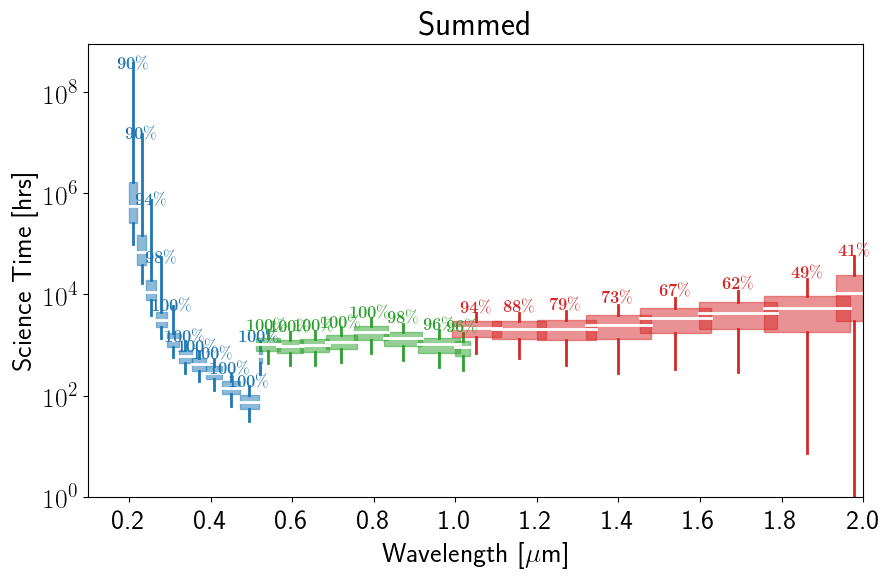

In [34]:
drm = drmA
tmp = tmpA

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.set_title("Summed")
    
"""
Xdraw = len(tpbpcs_draws_tots[0][0])

# Transform quantities for boxplot
tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
for i in range(Xdraw):
    for j in range(tp):
        for k in range(len(tpbpcs_draws_tots[j])):
            tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
"""

icount = 0
for ichan in range(len(spectroscopy.CHANNELS)):

    data = []
    positions = []
    widths = []

    for j in range(len(drm.bp_names[drm.bp_chan == ichan])):

        data.append(tmp[icount,:])
        positions.append(np.mean(spectrum[0][icount]))
        widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
        color1 = cc[ichan]

        comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
        comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
        #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
        #         ha = "center", va = "top", fontsize = 12, color = "w")
        ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                 ha = "center", va = "top", fontsize = 12, color = color1)

        icount += 1

    positions = np.array(positions)
    widths = np.array(widths)
    bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                      boxprops = {"color" : color1, "alpha" : 0.5}, 
                      whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                      capprops = {"color" : color1, "linewidth" : 0.0}, 
                      medianprops = {"color" : "w", "linewidth" : 2.0}, 
                      patch_artist=True, positions = positions, whis = [5, 95]); 

    for patch in bp1['boxes']:
        patch.set_facecolor(color1)

ax2.set_ylabel("Science Time [hrs]")
#ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
ax2.set_yscale("log")

ax2.set_xlabel("Wavelength [$\mu$m]")
ax2.set_ylim(bottom = 1.0)

ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xlim(0.1, 2.0)
#ax2.set_xlim(0.4, 1.0)

(0.1, 2.0)

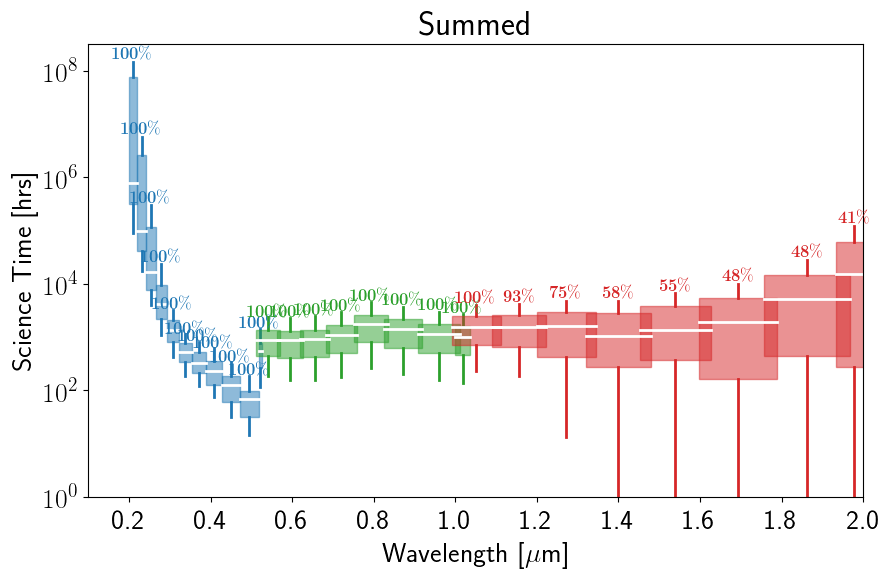

In [35]:
drm = drmB
tmp = tmpB

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.set_title("Summed")
    
"""
Xdraw = len(tpbpcs_draws_tots[0][0])

# Transform quantities for boxplot
tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
for i in range(Xdraw):
    for j in range(tp):
        for k in range(len(tpbpcs_draws_tots[j])):
            tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
"""

icount = 0
for ichan in range(len(spectroscopy.CHANNELS)):

    data = []
    positions = []
    widths = []

    for j in range(len(drm.bp_names[drm.bp_chan == ichan])):

        data.append(tmp[icount,:])
        positions.append(np.mean(spectrum[0][icount]))
        widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
        color1 = cc[ichan]

        comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
        comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
        #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
        #         ha = "center", va = "top", fontsize = 12, color = "w")
        ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                 ha = "center", va = "top", fontsize = 12, color = color1)

        icount += 1

    positions = np.array(positions)
    widths = np.array(widths)
    bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                      boxprops = {"color" : color1, "alpha" : 0.5}, 
                      whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                      capprops = {"color" : color1, "linewidth" : 0.0}, 
                      medianprops = {"color" : "w", "linewidth" : 2.0}, 
                      patch_artist=True, positions = positions, whis = [5, 95]); 

    for patch in bp1['boxes']:
        patch.set_facecolor(color1)

ax2.set_ylabel("Science Time [hrs]")
#ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
ax2.set_yscale("log")

ax2.set_xlabel("Wavelength [$\mu$m]")
ax2.set_ylim(bottom = 1.0)

ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xlim(0.1, 2.0)
#ax2.set_xlim(0.4, 1.0)

In [36]:
tmpA = drmA.tpbpcs_rect.T
tmpB = drmB.tpbpcs_rect.T

(0.1, 2.1)

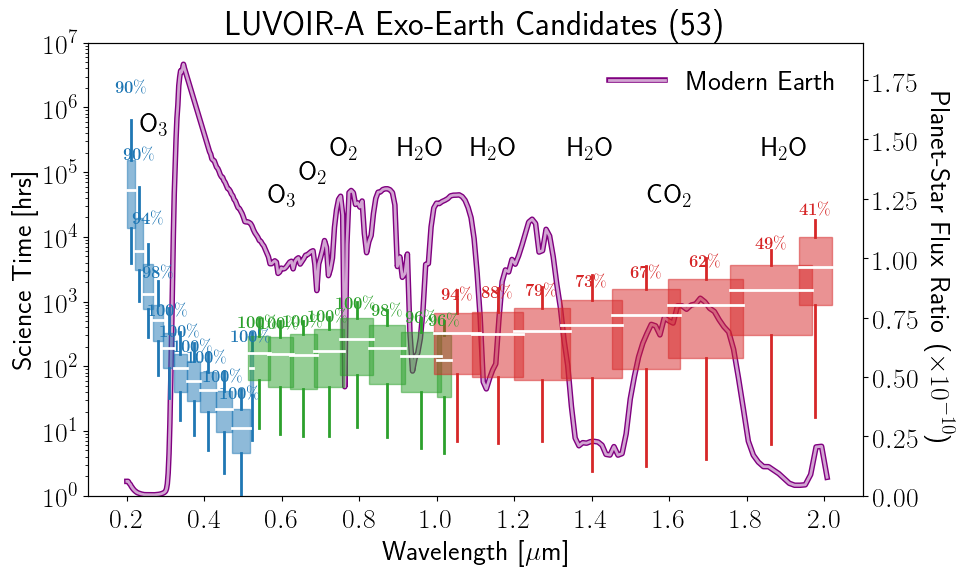

In [37]:
drm = drmA
tmp = drm.tpbpcs_rect.T

plot_earth = True

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.set_title("LUVOIR-A Exo-Earth Candidates (%i)" %drm.NBIAS)

icount = 0
for ichan in range(len(spectroscopy.CHANNELS)):

    data = []
    positions = []
    widths = []

    for j in range(len(drm.bp_names[drm.bp_chan == ichan])):
        
        nanmask = np.isfinite(tmp[icount,:])

        data.append(tmp[icount,nanmask])
        positions.append(np.mean(spectrum[0][icount]))
        widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
        color1 = cc[ichan]

        comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
        comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
        #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
        #         ha = "center", va = "top", fontsize = 12, color = "w")
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.05, 0.5, 0.97])
        ax2.text(positions[j], q_h, comp_str2, 
                 ha = "center", va = "top", fontsize = 12, color = color1)
        
        #ax2.plot(drm.bandpasses[icount], [q_50, q_50], color = color1, zorder = 120, ls = "dashed")
        
        icount += 1

    positions = np.array(positions)
    widths = np.array(widths)
    bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                      boxprops = {"color" : color1, "alpha" : 0.5}, 
                      whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                      capprops = {"color" : color1, "linewidth" : 0.0}, 
                      medianprops = {"color" : "w", "linewidth" : 2.0}, 
                      patch_artist=True, positions = positions, whis = [5, 95]); 

    for patch in bp1['boxes']:
        patch.set_facecolor(color1)

if plot_earth: 
    
    ax = ax2.twinx()
    ax2.set_zorder(100)
    ax2.patch.set_visible(False)

    ax.set_xlabel("Wavelength [$\mu$m]")
    ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)", rotation = 270, labelpad = 25)
    for i in range(len(bp_names)):
        if i not in iremove:
            pass
            #ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
            #ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
            #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

    drmA.cn.telescope.lammin = 0.2
    drmA.cn.telescope.lammax = 2.0
    drmA.cn.telescope.resolution = 140.
    # Re-do count rate calcs for true Earth spectrum
    drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
    l1, = ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 0, lw = 4.0, alpha = 1.)
    l2, = ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 0, lw = 2.0, alpha = 0.65)
    ax.set_ylim(bottom=0.0)
    ax.legend([(l1, l2)], [("Modern Earth")], framealpha = 0.0)
    
    # Label Molecules
    ax.text(0.27, 1.55, "O$_3$", ha = "center", va = "center")
    ax.text(0.6, 1.25, "O$_3$", ha = "center", va = "center")
    ax.text(0.68, 1.35, "O$_2$", ha = "center", va = "center")
    ax.text(0.76, 1.45, "O$_2$", ha = "center", va = "center")
    ax.text(0.96, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.4, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.9, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.6, 1.25, "CO$_2$", ha = "center", va = "center")
        
ax2.set_ylabel("Science Time [hrs]")
#ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
ax2.set_yscale("log")

ax2.set_xlabel("Wavelength [$\mu$m]")
ax2.set_ylim(bottom = 1.0, top = 1e7)

ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xticklabels(["$0.2$", "$0.4$", "$0.6$", "$0.8$", "$1.0$", "$1.2$", "$1.4$", "$1.6$", "$1.8$", "$2.0$"])
ax2.set_xlim(0.1, 2.1)
#ax2.set_xlim(0.4, 1.0)

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_bp10_science_time_%s.pdf" %drm.architecture, bbox_inches = "tight")

(0.1, 2.1)

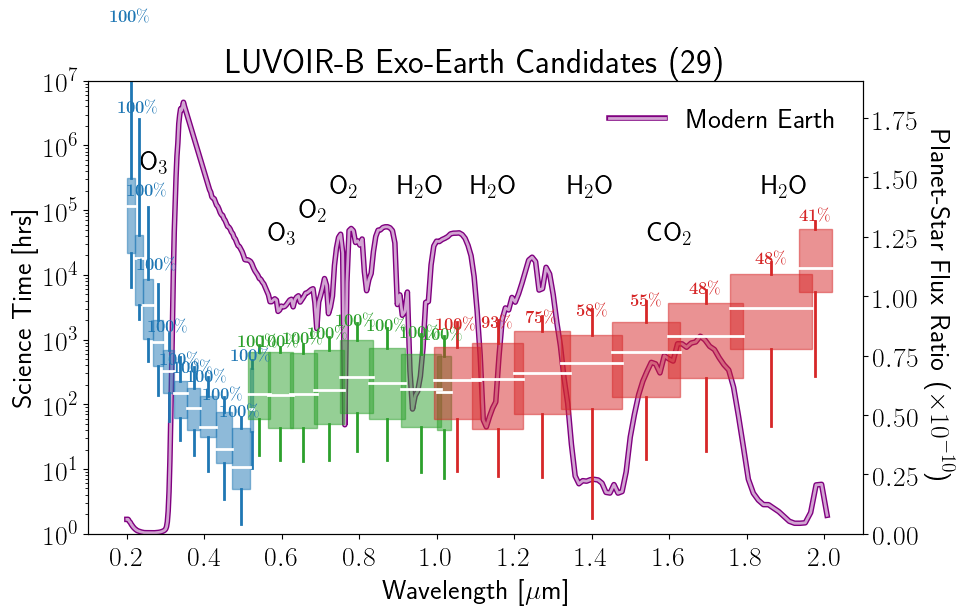

In [38]:
drm = drmB
tmp = tmpB

plot_earth = True

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.set_title("LUVOIR-B Exo-Earth Candidates (%i)" %drm.NBIAS)

icount = 0
for ichan in range(len(spectroscopy.CHANNELS)):

    data = []
    positions = []
    widths = []

    for j in range(len(drm.bp_names[drm.bp_chan == ichan])):
        
        nanmask = np.isfinite(tmp[icount,:])

        data.append(tmp[icount,nanmask])
        positions.append(np.mean(spectrum[0][icount]))
        widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
        color1 = cc[ichan]

        comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
        comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
        #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
        #         ha = "center", va = "top", fontsize = 12, color = "w")
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.05, 0.5, 0.98])
        ax2.text(positions[j], q_h, comp_str2, 
                 ha = "center", va = "top", fontsize = 12, color = color1)

        icount += 1

    positions = np.array(positions)
    widths = np.array(widths)
    bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                      boxprops = {"color" : color1, "alpha" : 0.5}, 
                      whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                      capprops = {"color" : color1, "linewidth" : 0.0}, 
                      medianprops = {"color" : "w", "linewidth" : 2.0}, 
                      patch_artist=True, positions = positions, whis = [5, 95]); 

    for patch in bp1['boxes']:
        patch.set_facecolor(color1)

if plot_earth: 
    
    ax = ax2.twinx()
    ax2.set_zorder(100)
    ax2.patch.set_visible(False)

    ax.set_xlabel("Wavelength [$\mu$m]")
    ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)", rotation = 270, labelpad = 25)
    for i in range(len(bp_names)):
        if i not in iremove:
            pass
            #ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
            #ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
            #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

    drmA.cn.telescope.lammin = 0.2
    drmA.cn.telescope.lammax = 2.0
    drmA.cn.telescope.resolution = 140.
    # Re-do count rate calcs for true Earth spectrum
    drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
    l1, = ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 0, lw = 4.0, alpha = 1.)
    l2, = ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 0, lw = 2.0, alpha = 0.65)
    ax.set_ylim(bottom=0.0)
    ax.legend([(l1, l2)], [("Modern Earth")], framealpha = 0.0)
    
    # Label Molecules
    ax.text(0.27, 1.55, "O$_3$", ha = "center", va = "center")
    ax.text(0.6, 1.25, "O$_3$", ha = "center", va = "center")
    ax.text(0.68, 1.35, "O$_2$", ha = "center", va = "center")
    ax.text(0.76, 1.45, "O$_2$", ha = "center", va = "center")
    ax.text(0.96, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.4, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.9, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.6, 1.25, "CO$_2$", ha = "center", va = "center")
        
ax2.set_ylabel("Science Time [hrs]")
#ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
ax2.set_yscale("log")

ax2.set_xlabel("Wavelength [$\mu$m]")
ax2.set_ylim(bottom = 1.0, top = 1e7)

ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xticklabels(["$0.2$", "$0.4$", "$0.6$", "$0.8$", "$1.0$", "$1.2$", "$1.4$", "$1.6$", "$1.8$", "$2.0$"])
ax2.set_xlim(0.1, 2.1)
#ax2.set_xlim(0.4, 1.0)

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_bp10_science_time_%s.pdf" %drm.architecture, bbox_inches = "tight")

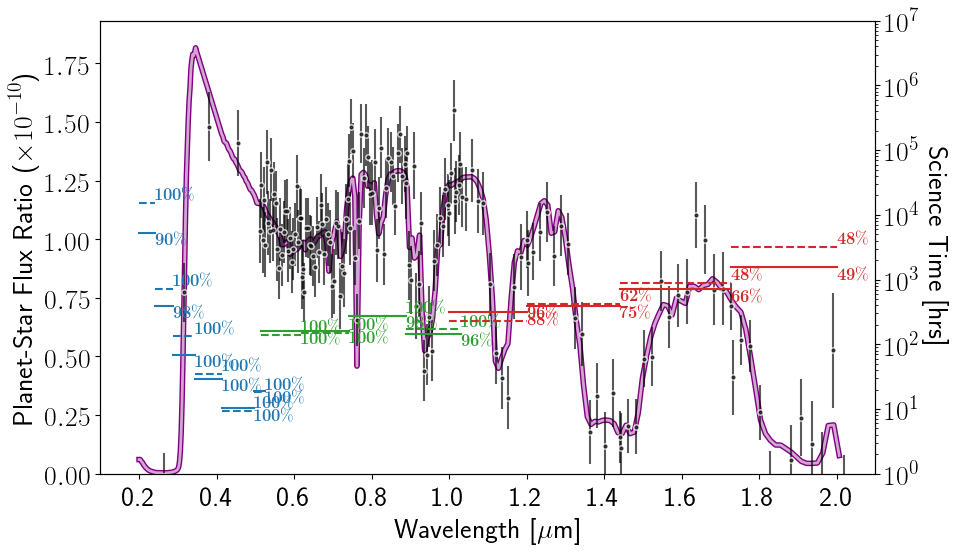

In [173]:
iremove = []
cc = ["C0", "C2", "C3"]
bp_names = drmA.bp_names
plot_lines = True

fig, ax = plt.subplots(figsize = (10,6))

ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)
            
if plot_lines:

    ax2 = ax.twinx()

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):

        data = []
        positions = []
        widths = []

        for j in range(len(drmA.bp_names[drmA.bp_chan == ichan])):
            
            #"""
            drm = drmA
            tmp = tmpA
            nanmask = np.isfinite(tmp[icount,:])
            color1 = cc[ichan]
            comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.25, 0.5, 0.75])
            ax2.text(drm.bandpasses[icount][1], q_50, comp_str2, 
                     ha = "left", va = "top", fontsize = 12, color = color1)
            ax2.plot(drm.bandpasses[icount], [q_50, q_50], color = color1, zorder = 120)
            #"""
            
            #"""
            drm = drmB
            tmp = tmpB
            nanmask = np.isfinite(tmp[icount,:])
            color1 = cc[ichan]
            comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.25, 0.5, 0.75])
            ax2.text(drm.bandpasses[icount][1], q_50, comp_str2,
                     ha = "left", va = "bottom", fontsize = 12, color = color1)
            ax2.plot(drm.bandpasses[icount], [q_50, q_50], color = color1, zorder = 120, ls = "dashed")
            #"""

            icount += 1
        

    ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = 1.0, top = 1e7)

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xlim(0.1, 2.1)
    #ax2.set_xlim(0.4, 1.0)

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_test.pdf" %architecture, bbox_inches = "tight")

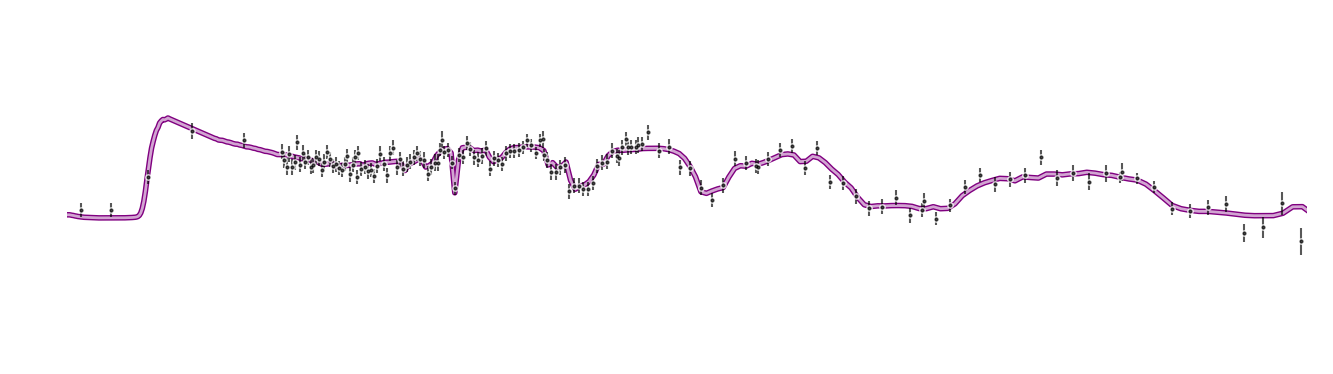

In [271]:
iremove = []
cc = ["C0", "C2", "C3"]
bp_names = drmA.bp_names

fig, ax = plt.subplots(figsize = (16,2))

ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
#ax.set_ylim(bottom=0.0)
ax.set_xlim(drmA.cn.telescope.lammin, drmA.cn.telescope.lammax)

ax.set_axis_off()

fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/fancy_spectrum.pdf", bbox_inches = "tight", facecolor = "none")

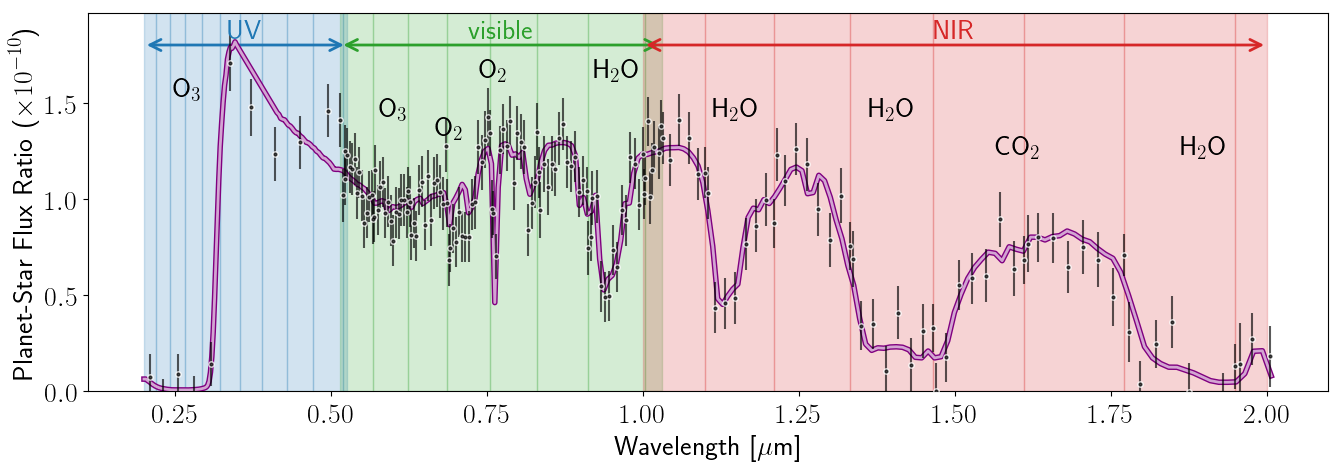

In [39]:
fig, ax = plt.subplots(figsize = (16,5))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

# Label Molecules
ax.text(0.27, 1.55, "O$_3$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.6, 1.45, "O$_3$",   ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.69, 1.35, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.76, 1.65, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.96, 1.65, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.4, 1.45, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.9, 1.25, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.6, 1.25, "CO$_2$",  ha = "center", va = "center", color = "k", zorder = 130)

yloc = 1.8
lammin_inst = drmA.bandpasses[drmA.bp_chan == 0][0][0] 
lammax_inst = drmA.bandpasses[drmA.bp_chan == 0][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "UV"
color = cc[0]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmA.bandpasses[drmA.bp_chan == 1][0][0] 
lammax_inst = drmA.bandpasses[drmA.bp_chan == 1][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "visible"
color = cc[1]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmA.bandpasses[drmA.bp_chan == 2][0][0] 
lammax_inst = drmA.bandpasses[drmA.bp_chan == 2][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "NIR"
color = cc[2]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

if plot_boxes:

    ax2 = ax.twinx()
    
    """
    Xdraw = len(tpbpcs_draws_tots[0][0])

    # Transform quantities for boxplot
    tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
    for i in range(Xdraw):
        for j in range(tp):
            for k in range(len(tpbpcs_draws_tots[j])):
                tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
    """

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):
        
        data = []
        positions = []
        widths = []
        
        for j in range(len(bp_names[bp_chan == ichan])):
                
            data.append(tmp[icount,:])
            positions.append(np.mean(spectrum[0][icount]))
            widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
            color1 = cc[ichan]

            comp_str = "$%i \%%$" %(100.*frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                     ha = "center", va = "top", fontsize = 12, color = color1)

            icount += 1

        positions = np.array(positions)
        widths = np.array(widths)
        bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                          boxprops = {"color" : color1, "alpha" : 0.5}, 
                          whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                          capprops = {"color" : color1, "linewidth" : 0.0}, 
                          medianprops = {"color" : "w", "linewidth" : 2.0}, 
                          patch_artist=True, positions = positions, whis = [5, 95]); 

        for patch in bp1['boxes']:
            patch.set_facecolor(color1)

    ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = 0.0)

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xlim(0.1, 2.0)
    #ax2.set_xlim(0.4, 1.0)

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_spectrum_SNR8.5_wide.pdf", bbox_inches = "tight")

In [179]:
def plot_bp_exptimes(drm, plot_spectrum = True, title = None, ylims = (1.0, 1e7)):
    """
    Plot the exposure time per bandpass for each bandpass
    """
    
    # Reshape exposure times
    tmp = drm.tpbpcs_rect.T
    
    # Calculate clean spectrum 
    output = drm.complete_spectrum_time()
    spectrum = output[2]

    fig, ax2 = plt.subplots(figsize = (16,5))
    
    if title is not None:
        ax2.set_title(title)

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):

        data = []
        positions = []
        widths = []

        for j in range(len(drm.bp_names[drm.bp_chan == ichan])):

            nanmask = np.isfinite(tmp[icount,:])

            data.append(tmp[icount,nanmask])
            positions.append(np.mean(spectrum[0][icount]))
            widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
            color1 = cc[ichan]

            comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.05, 0.5, 0.97])
            ax2.text(positions[j], q_h, comp_str2, 
                     ha = "center", va = "top", fontsize = 12, color = color1)

            #ax2.plot(drm.bandpasses[icount], [q_50, q_50], color = color1, zorder = 120, ls = "dashed")

            icount += 1

        positions = np.array(positions)
        widths = np.array(widths)
        bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                          boxprops = {"color" : color1, "alpha" : 0.5}, 
                          whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                          capprops = {"color" : color1, "linewidth" : 0.0}, 
                          medianprops = {"color" : "w", "linewidth" : 2.0}, 
                          patch_artist=True, positions = positions, whis = [5, 95]); 

        for patch in bp1['boxes']:
            patch.set_facecolor(color1)

    if plot_spectrum: 

        ax = ax2.twinx()
        ax2.set_zorder(100)
        ax2.patch.set_visible(False)

        ax.set_xlabel("Wavelength [$\mu$m]")
        ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)", rotation = 270, labelpad = 25)
        for i in range(len(bp_names)):
            if i not in iremove:
                pass
                #ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
                #ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
                #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

        drm.cn.telescope.lammin = 0.2
        drm.cn.telescope.lammax = 2.0
        drm.cn.telescope.resolution = 140.
        # Re-do count rate calcs for true Earth spectrum
        drm.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
        l1, = ax.plot(drm.cn.lam, 1e10*drm.cn.Cratio, color = "purple", zorder = 0, lw = 4.0, alpha = 1.)
        l2, = ax.plot(drm.cn.lam, 1e10*drm.cn.Cratio, color = "w", zorder = 0, lw = 2.0, alpha = 0.65)
        ax.set_ylim(bottom=0.0)
        ax.legend([(l1, l2)], [("Modern Earth")], framealpha = 0.0)

        # Label Molecules
        ax.text(0.27, 1.55, "O$_3$", ha = "center", va = "center")
        ax.text(0.6, 1.25, "O$_3$", ha = "center", va = "center")
        ax.text(0.68, 1.35, "O$_2$", ha = "center", va = "center")
        ax.text(0.76, 1.45, "O$_2$", ha = "center", va = "center")
        ax.text(0.96, 1.45, "H$_2$O", ha = "center", va = "center")
        ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center")
        ax.text(1.4, 1.45, "H$_2$O", ha = "center", va = "center")
        ax.text(1.9, 1.45, "H$_2$O", ha = "center", va = "center")
        ax.text(1.6, 1.25, "CO$_2$", ha = "center", va = "center")

    ax2.set_ylabel("Science Time [hrs]")
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = ylims[0], top = ylims[1])

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels(["$0.2$", "$0.4$", "$0.6$", "$0.8$", "$1.0$", "$1.2$", "$1.4$", "$1.6$", "$1.8$", "$2.0$"])
    ax2.set_xlim(0.1, 2.1)
    #ax2.set_xlim(0.4, 1.0)

    #fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_bp10_science_time_%s.pdf" %drm.architecture, bbox_inches = "tight")
    
    return fig

# DRM Figures

In [17]:
def get_iremove(drm, Nremove_uv = 0, Nremove_nir = 0):
    """
    Convenience function for getting bandpass indices 
    to remove from exposure time estimates. Removes the 
    `Nremove_uv` shortest UV bandpasses, and the `Nremove_nir` longest 
    NIR bandpasses. 
    """
    iremove = []
    
    ibp = np.arange(len(drm.bp_names))
    iremove.append(ibp[drm.bp_chan == 0][:Nremove_uv])
    if Nremove_nir > 0:
        iremove.append(ibp[drm.bp_chan == 2][-Nremove_nir:])
    iremove = np.hstack(iremove)
    
    return iremove

/Users/Jake/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/Users/Jake/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


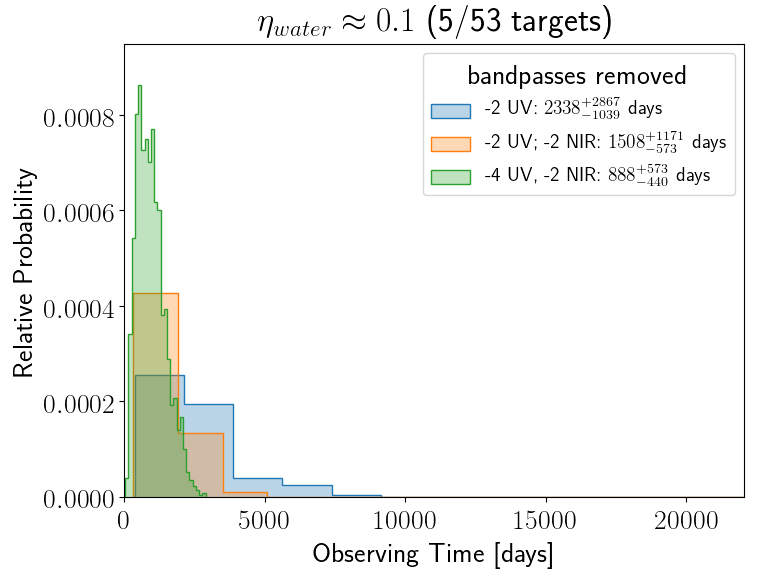

In [20]:
Xdraw = 2000
bins = 25
drm = drmA

np.random.seed(seed = None)

# Run DRM for Xdraw number of times
iremove = get_iremove(drm, Nremove_uv=0, Nremove_nir=0)
t_totx0 = np.zeros(Xdraw)
for x in range(Xdraw):
    t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm.run_hec_drm(Ndraw = drm.Ndraw, verbose = False, iremove = iremove, wantexp_days=drm.wantexp)
    t_totx0[x] = np.sum(t_tot_sort)
    
# Run DRM for Xdraw number of times
iremove = get_iremove(drm, Nremove_uv=2, Nremove_nir=0)
t_totx1 = np.zeros(Xdraw)
for x in range(Xdraw):
    t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm.run_hec_drm(Ndraw = drm.Ndraw, verbose = False, iremove = iremove, wantexp_days=drm.wantexp)
    t_totx1[x] = np.sum(t_tot_sort)

# Run DRM for Xdraw number of times
#iremove = [0,13]
iremove = get_iremove(drm, Nremove_uv=2, Nremove_nir=2)
t_totx2 = np.zeros(Xdraw)
for x in range(Xdraw):
    t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm.run_hec_drm(Ndraw = drm.Ndraw, verbose = False, iremove = iremove, wantexp_days=drm.wantexp)
    t_totx2[x] = np.sum(t_tot_sort)

# Run DRM for Xdraw number of times
#iremove = [0,1,13]
iremove = get_iremove(drm, Nremove_uv=4, Nremove_nir=2)
t_totx3 = np.zeros(Xdraw)
for x in range(Xdraw):
    t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm.run_hec_drm(Ndraw = drm.Ndraw, verbose = False, iremove = iremove, wantexp_days=drm.wantexp)
    t_totx3[x] = np.sum(t_tot_sort)

# Plot exposure time hist
fig, ax = plt.subplots(1, figsize = (8,6))
ax.set_xlabel("Observing Time [days]")
ax.set_ylabel("Relative Probability")
ax.set_title(r"$\eta_{water} \approx %.1f $ (%i/%i targets)" %(float(drm.Ndraw)/float(drm.NBIAS), drm.Ndraw, drm.NBIAS))

labels = []
handles = []

"""
label = "complete spectra"
t_totx = t_totx0
color = "C3"
ctime_sum = t_totx / 24.
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(ctime_sum)
result = "$%.1f^{+%.1f}_{-%.1f}$" %(q_50, q_p, q_m)
h = ax.hist(ctime_sum, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(ctime_sum, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s days" %result)
"""

label = "-2 UV"
t_totx = t_totx1
color = "C0"
ctime_sum = t_totx / 24.
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(ctime_sum)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(ctime_sum, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(ctime_sum, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s days" %result)

ax.set_xlim(left = 0.0, right=0.50*np.max(h[1]))

label = "-2 UV; -2 NIR"
t_totx = t_totx2
color = "C1"
ctime_sum = t_totx / 24.
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(ctime_sum)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(ctime_sum, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(ctime_sum, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s days" %result)

label = "-4 UV, -2 NIR"
t_totx = t_totx3
color = "C2"
ctime_sum = t_totx / 24.
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(ctime_sum)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(ctime_sum, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(ctime_sum, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s days" %result)

ax.set_ylim(top = 1.1*np.max(h[0]))
ax.legend(handles, labels, fontsize = 14, title = "bandpasses removed")

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_removing_bands_expose_hist.pdf" %architecture, bbox_inches = "tight")

In [21]:
remove = get_iremove(drm, Nremove_uv=4, Nremove_nir=2)

Xdraw = 100
Ndraws = np.arange(1,drm.NBIAS)
wantdays = np.linspace(5, 365*2, 20)

zcube = np.zeros((len(Ndraws), len(wantdays), Xdraw))

np.random.seed(seed = None)

for i in range(len(Ndraws)):
    for j in range(len(wantdays)):
        for k in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm.run_hec_drm(Ndraw = Ndraws[i], wantexp_days = wantdays[j], verbose = False, iremove = iremove) 
            zcube[i,j,k] = count_in_texp

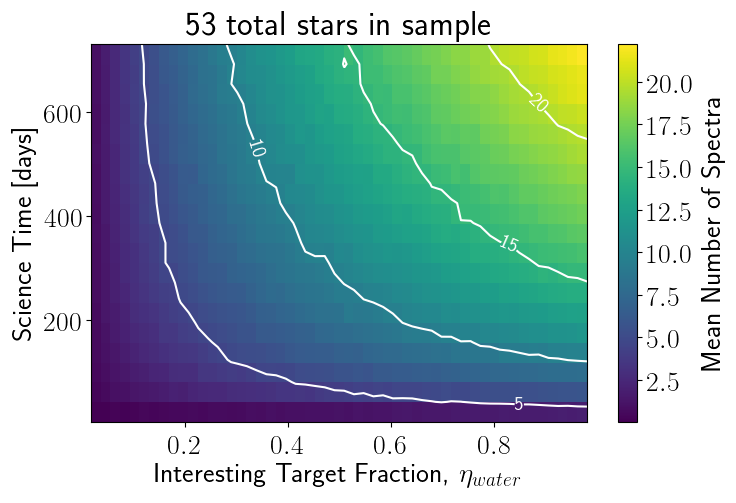

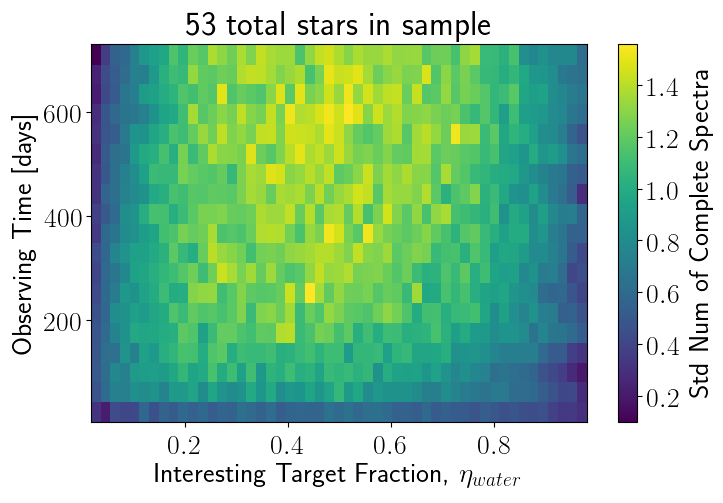

In [22]:
zmean = np.mean(zcube, axis = 2)

contour_intervals = 5.0
levels = list(np.arange(1, zmean.max() / contour_intervals) * contour_intervals)

fig, ax = plt.subplots()
ax.set_title("%i total stars in sample" %drm.NBIAS)
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Science Time [days]")
p = ax.pcolor(Ndraws / float(drm.NBIAS), wantdays, zmean.T)
cln = ax.contour(Ndraws / float(drm.NBIAS), wantdays, zmean.T, colors="w", levels = levels)
plt.clabel(cln, inline=1, fontsize=14, inline_spacing=1, fmt = "%i")
fig.colorbar(p, label = "Mean Number of Spectra")
p.set_rasterized(True)
#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_time_vs_eta_case4.pdf" %architecture, bbox_inches = "tight")

zstd = np.std(zcube, axis = 2)

fig, ax = plt.subplots()
ax.set_title("%i total stars in sample" %drm.NBIAS)
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Observing Time [days]")
p = ax.pcolor(Ndraws / float(drm.NBIAS), wantdays, zstd.T)
fig.colorbar(p, label = "Std Num of Complete Spectra")

In [105]:
ibp = np.arange(len(drm.bp_names))

case_names = [
    "All", 
    "-2 UV", 
    "-2 UV; -2 NIR", 
    "-4 UV; -2 NIR", 
    "Only vis",
    r"Only O$_2$ A-Band"
]

cases = [
    get_iremove(drm, Nremove_uv=0, Nremove_nir=0), 
    get_iremove(drm, Nremove_uv=2, Nremove_nir=0), 
    get_iremove(drm, Nremove_uv=2, Nremove_nir=2), 
    get_iremove(drm, Nremove_uv=4, Nremove_nir=2), 
    ibp[(drm.bp_chan == 0) | (drm.bp_chan == 2)],
    ibp[(drm.bandpasses[:,0] > 0.76) | (drm.bandpasses[:,1] < 0.76)]
]

In [102]:
# 1-year program
Xdraw = 2000
dt = 365.
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drm.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(Ndraws), len(cases), 3))
t_scix = np.zeros((len(Ndraws), len(cases), 3))
t_ovrx = np.zeros((len(Ndraws), len(cases), 3))
countx = np.zeros((len(Ndraws), len(cases), 3))
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm.run_hec_drm(Ndraw = Ndraws[i], verbose = False, iremove = cases[j], wantexp_days=dt)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m

In [103]:
print("------ Number of Spectra in %.1f days ------" %dt)
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        print("N=%i, case=%s : $%i^{+%i}_{-%i}$ spectra" %(Ndraws[i], case_names[j], countx[i,j,0], countx[i,j,1], countx[i,j,2]))
        
print("------ Exposure time [days] total, science, overhead ------")
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        print("N=%i, case=%s : $%.1f^{+%.1f}_{-%.1f}$, $%.1f^{+%.1f}_{-%.1f}$, $%.1f^{+%.1f}_{-%.1f}$" %(Ndraws[i], case_names[j], 
                                                                                                         t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2], 
                                                                                                         t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2], 
                                                                                                         t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2]))

------ Number of Spectra in 365.0 days ------
N=5, case=All : $1^{+0}_{-1}$ spectra
N=5, case=-2 UV : $2^{+1}_{-1}$ spectra
N=5, case=-2 UV; -2 NIR : $2^{+1}_{-0}$ spectra
N=5, case=-4 UV; -2 NIR : $3^{+1}_{-0}$ spectra
N=5, case=Only vis : $4^{+1}_{-0}$ spectra
N=5, case=Only O2 A-Band : $5^{+0}_{-0}$ spectra
N=11, case=All : $1^{+1}_{-1}$ spectra
N=11, case=-2 UV : $3^{+1}_{-1}$ spectra
N=11, case=-2 UV; -2 NIR : $4^{+1}_{-1}$ spectra
N=11, case=-4 UV; -2 NIR : $6^{+1}_{-1}$ spectra
N=11, case=Only vis : $8^{+1}_{-1}$ spectra
N=11, case=Only O2 A-Band : $11^{+0}_{-0}$ spectra
N=26, case=All : $2^{+1}_{-1}$ spectra
N=26, case=-2 UV : $5^{+1}_{-1}$ spectra
N=26, case=-2 UV; -2 NIR : $6^{+1}_{-1}$ spectra
N=26, case=-4 UV; -2 NIR : $11^{+1}_{-1}$ spectra
N=26, case=Only vis : $14^{+1}_{-2}$ spectra
N=26, case=Only O2 A-Band : $24^{+1}_{-1}$ spectra
N=53, case=All : $3^{+0}_{-0}$ spectra
N=53, case=-2 UV : $7^{+0}_{-0}$ spectra
N=53, case=-2 UV; -2 NIR : $9^{+0}_{-0}$ spectra
N=53, case=

In [95]:
from jakely.plot import ColorTable

Text(0,1,'Number of Spectra in 365 days')

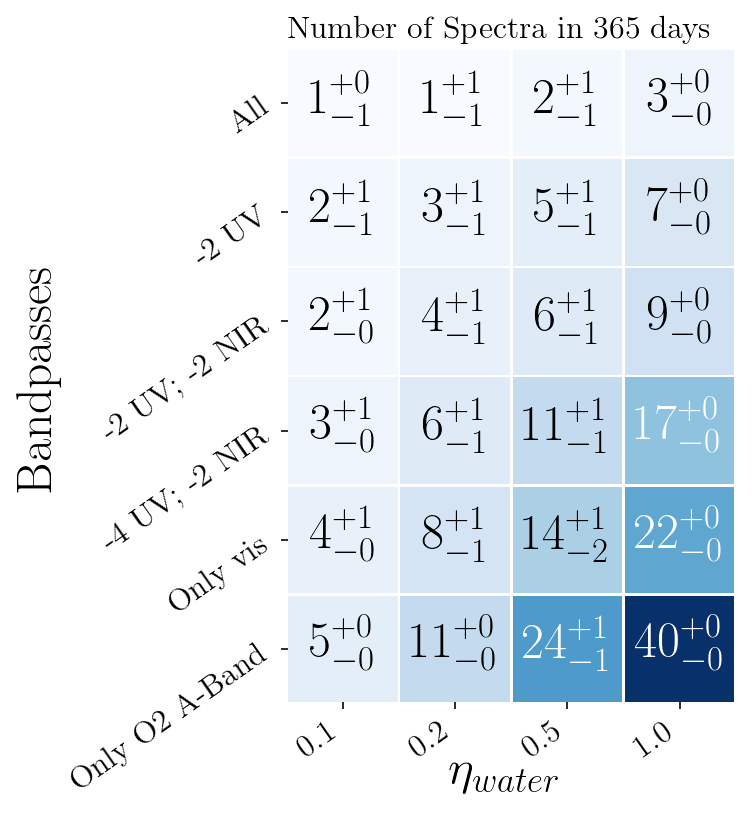

In [104]:
fig, ax = ColorTable(etas, case_names, countx[:,:,0], fmt = "%i", data_pm = (countx[:,:,1], countx[:,:,2]), labelfontsize=16, labelrotation=35, 
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of Spectra in %i days" %dt, ha = "left", fontsize = 16, loc = "left")

Text(0,1,'Total Exposure Time (days)')

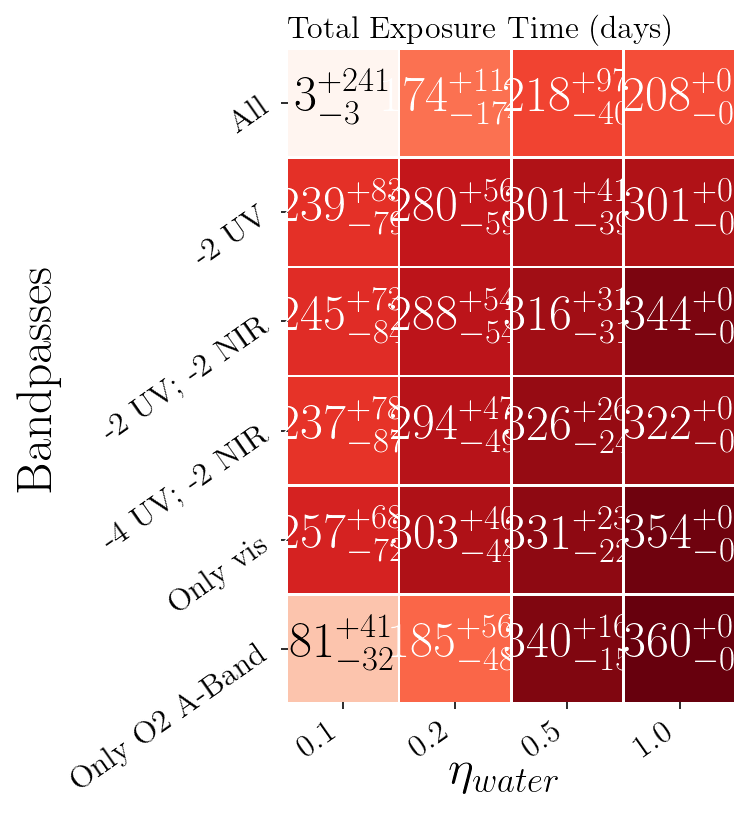

In [97]:
fig, ax = ColorTable(etas, case_names, t_totx[:,:,0], fmt = "%i", data_pm = (t_totx[:,:,1], t_totx[:,:,2]), labelfontsize=16, labelrotation=35, colormap = "Reds",
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Total Exposure Time (days)", ha = "left", fontsize = 16, loc = "left")

In [98]:
# 1/2-year program
Xdraw = 2000
dt = 365. / 2.0
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drm.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(Ndraws), len(cases), 3))
t_scix = np.zeros((len(Ndraws), len(cases), 3))
t_ovrx = np.zeros((len(Ndraws), len(cases), 3))
countx = np.zeros((len(Ndraws), len(cases), 3))
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm.run_hec_drm(Ndraw = Ndraws[i], verbose = False, iremove = cases[j], wantexp_days=dt)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m

Text(0,1,'Number of Spectra in 182 days')

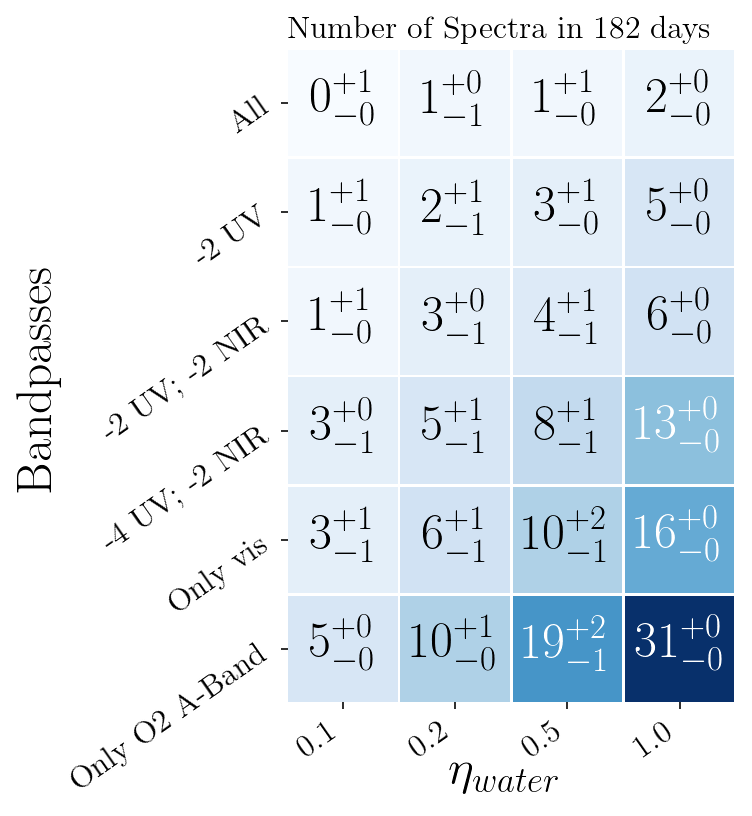

In [99]:
fig, ax = ColorTable(etas, case_names, countx[:,:,0], fmt = "%i", data_pm = (countx[:,:,1], countx[:,:,2]), labelfontsize=16, labelrotation=35, 
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of Spectra in %i days" %dt, ha = "left", fontsize = 16, loc = "left")

Text(0,1,'Total Exposure Time (days)')

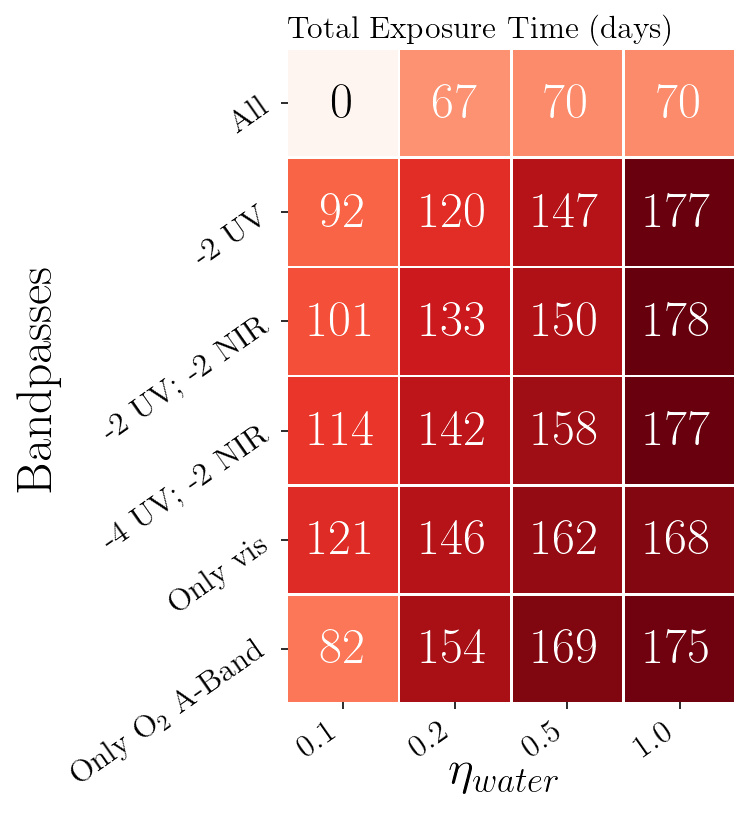

In [118]:
fig, ax = ColorTable(etas, case_names, t_totx[:,:,0], fmt = "%i", labelfontsize=16, labelrotation=35, colormap = "Reds",
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01, textsize = 16)
                     #data_pm = (t_totx[:,:,1], t_totx[:,:,2]))
ax[0,0].set_title("Total Exposure Time (days)", ha = "left", fontsize = 16, loc = "left")

## 10% Bandpasses

In [177]:
# Create LUVOIR DRM
drmx = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.1, 
    architecture = "A", 
    telescope_mods = {}
)

# Calculate table of exposure times
drmx.generate_exptime_table()

Text(0,1,'Total Exposure Time (days)')

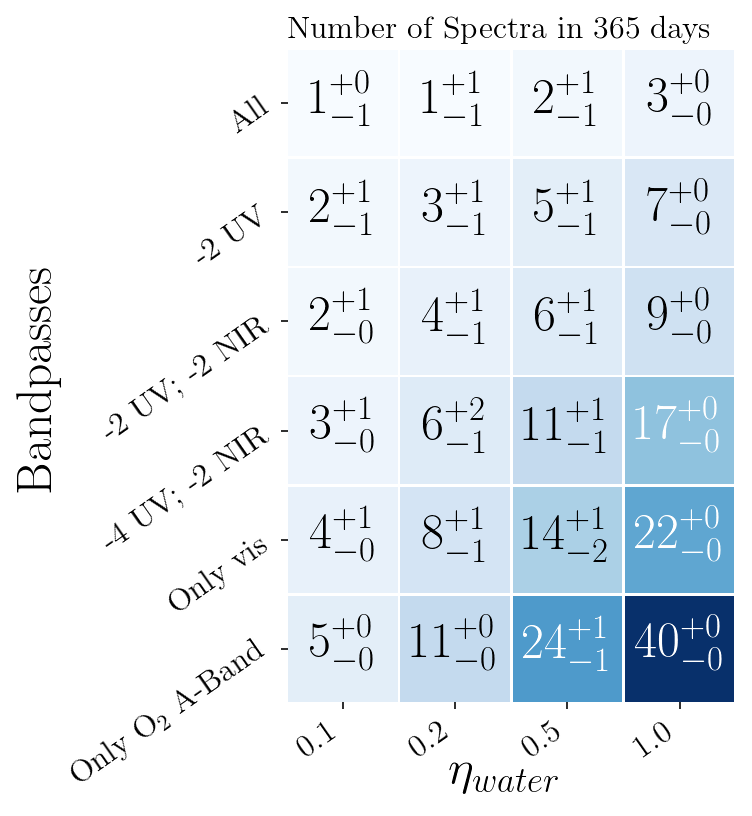

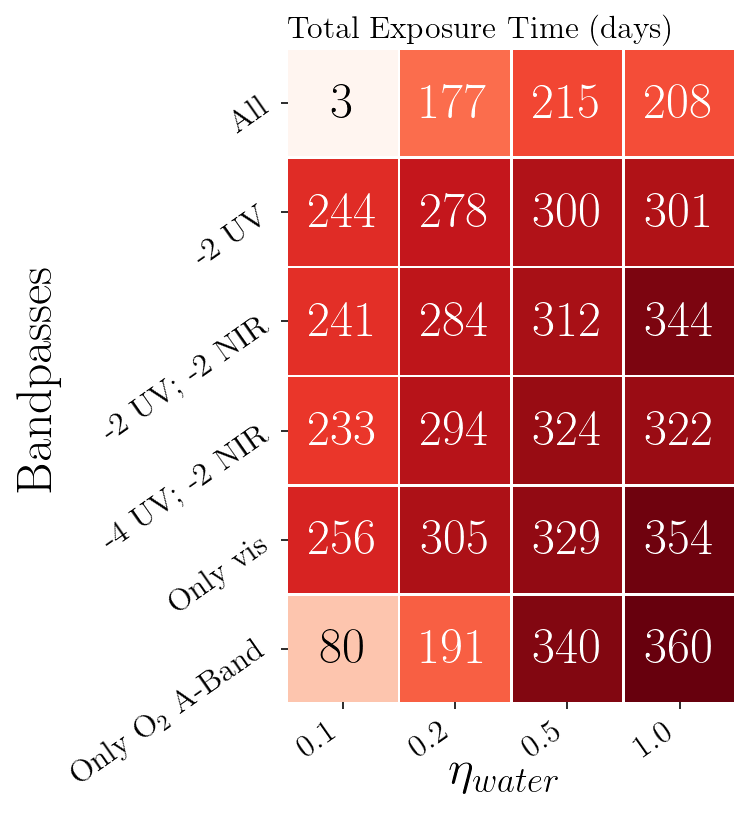

In [163]:
# Define cases 
ibp = np.arange(len(drmx.bp_names))
case_names = [
    "All", 
    "-2 UV", 
    "-2 UV; -2 NIR", 
    "-4 UV; -2 NIR", 
    "Only vis",
    r"Only O$_2$ A-Band"
]
cases = [
    get_iremove(drmx, Nremove_uv=0, Nremove_nir=0), 
    get_iremove(drmx, Nremove_uv=2, Nremove_nir=0), 
    get_iremove(drmx, Nremove_uv=2, Nremove_nir=2), 
    get_iremove(drmx, Nremove_uv=4, Nremove_nir=2), 
    ibp[(drmx.bp_chan == 0) | (drmx.bp_chan == 2)],
    ibp[(drmx.bandpasses[:,0] > 0.76) | (drmx.bandpasses[:,1] < 0.76)]
]

# Define eta range
Xdraw = 500
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(Ndraws), len(cases), 3))
t_scix = np.zeros((len(Ndraws), len(cases), 3))
t_ovrx = np.zeros((len(Ndraws), len(cases), 3))
countx = np.zeros((len(Ndraws), len(cases), 3))
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=drmx.wantexp)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m

# Make Table of results
fig, ax = ColorTable(etas, case_names, countx[:,:,0], fmt = "%i", data_pm = (countx[:,:,1], countx[:,:,2]), labelfontsize=16, labelrotation=35, 
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of Spectra in %i days" %drmx.wantexp, ha = "left", fontsize = 16, loc = "left")

fig, ax = ColorTable(etas, case_names, t_totx[:,:,0], fmt = "%i", labelfontsize=16, labelrotation=35, colormap = "Reds",
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01, textsize = 16)
                     #data_pm = (t_totx[:,:,1], t_totx[:,:,2]))
ax[0,0].set_title("Total Exposure Time (days)", ha = "left", fontsize = 16, loc = "left")

In [156]:
icase = 3

iremove = cases[icase]
iname = case_names[icase]

Xdraw = 200
Ndraws = np.arange(1,drmx.NBIAS)
wantdays = np.linspace(5, 365*2, 20)

zcube = np.zeros((len(Ndraws), len(wantdays), Xdraw))

np.random.seed(seed = None)

for i in range(len(Ndraws)):
    for j in range(len(wantdays)):
        for k in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], wantexp_days = wantdays[j], verbose = False, iremove = iremove) 
            zcube[i,j,k] = count_in_texp
            
zmean = np.mean(zcube, axis = 2)

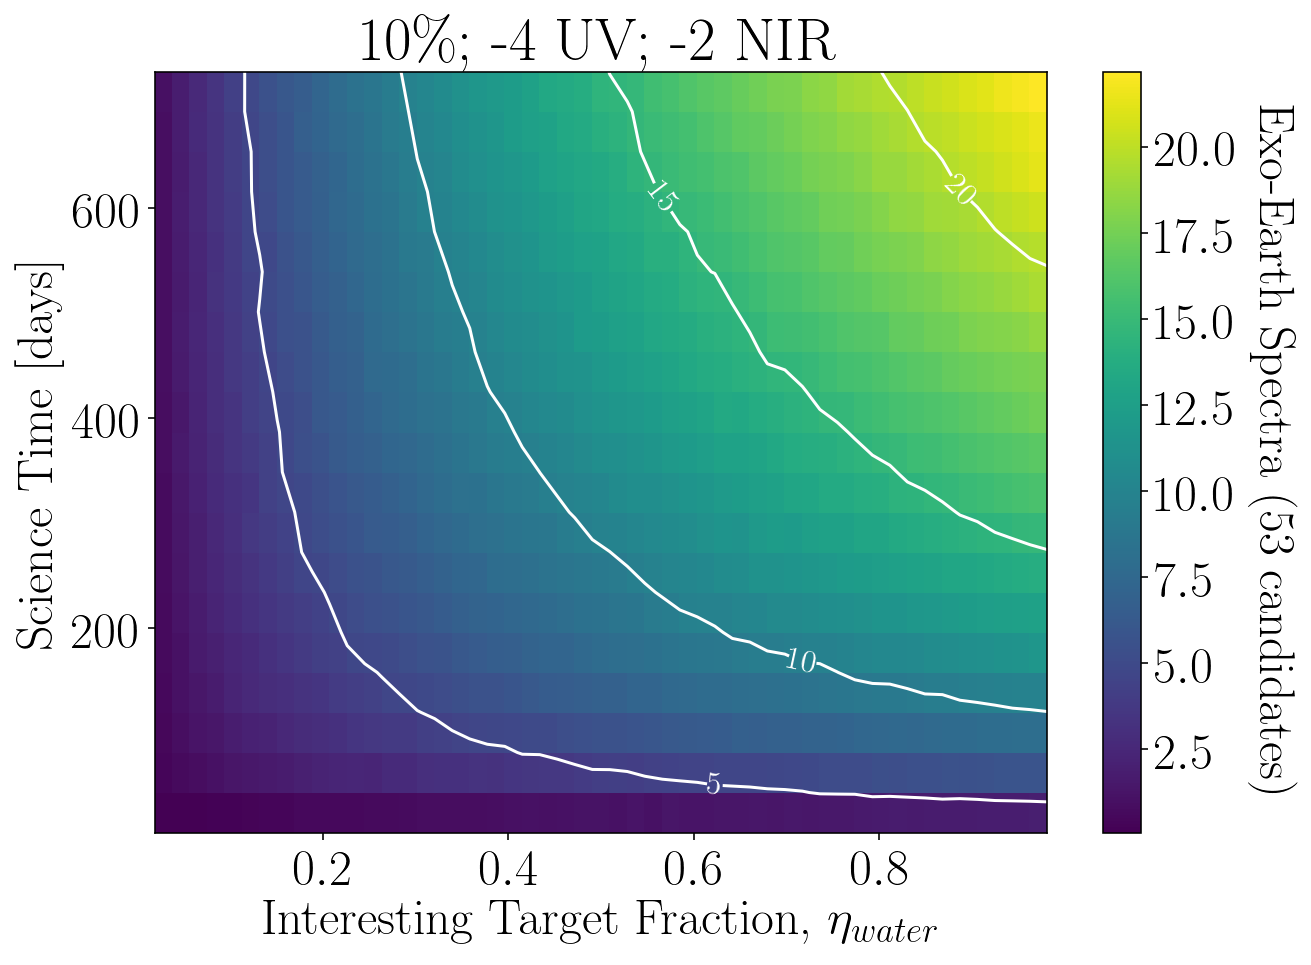

In [157]:
contour_intervals = 5.0
levels = list(np.arange(1, zmean.max() / contour_intervals) * contour_intervals)

fig, ax = plt.subplots(figsize = (10,7))
ax.set_title("%i total stars in sample" %drmx.NBIAS)
ax.set_title("%i\%%; %s" %(100*drmx.bandwidth, iname))
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Science Time [days]")
p = ax.pcolor(Ndraws / float(drmx.NBIAS), wantdays, zmean.T)
cln = ax.contour(Ndraws / float(drmx.NBIAS), wantdays, zmean.T, colors="w", levels = levels)
plt.clabel(cln, inline=1, fontsize=16, inline_spacing=1, fmt = "%i", rightside_up = True)
cbar = fig.colorbar(p)
cbar.set_label("Exo-Earth Spectra (%i candidates)" %drmx.NBIAS, rotation = 270, labelpad = 30)
p.set_rasterized(True)
#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_time_vs_eta_case4.pdf" %architecture, bbox_inches = "tight")

"""
zstd = np.std(zcube, axis = 2)

fig, ax = plt.subplots()
ax.set_title("%i total stars in sample" %drmx.NBIAS)
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Observing Time [days]")
p = ax.pcolor(Ndraws / float(drmx.NBIAS), wantdays, zstd.T)
fig.colorbar(p, label = "Std Num of Complete Spectra")
""";

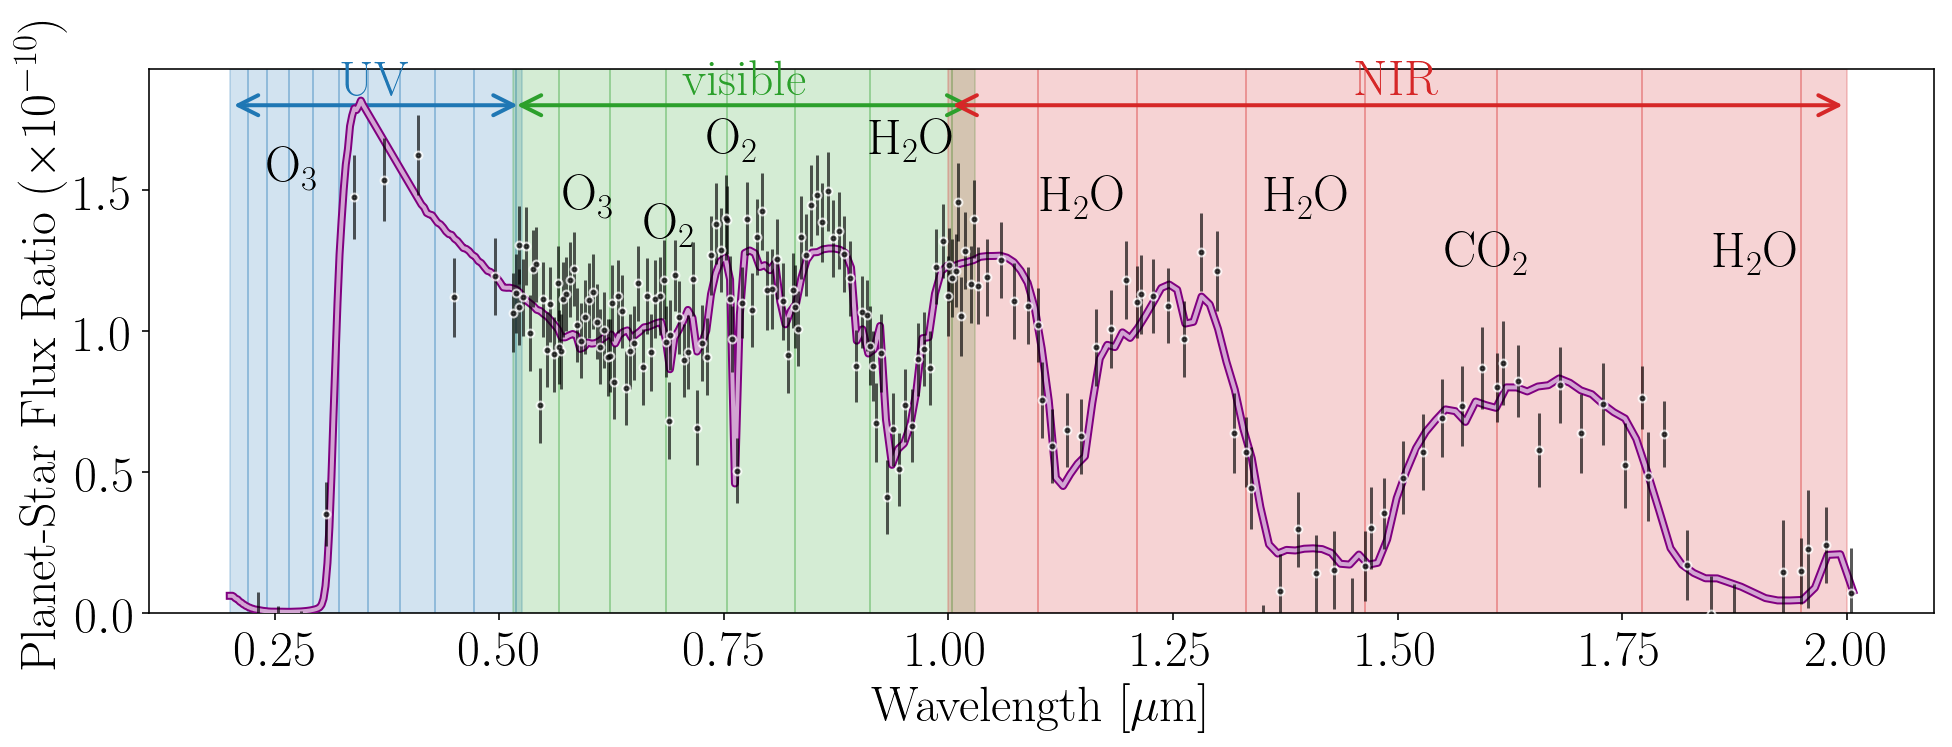

In [164]:
icase = 0

iremove = cases[icase]
cc = ["C0", "C2", "C3"]
bp_names = drmx.bp_names
plot_boxes = False

# Set planet and star parameters for an Earth-Sun analog at 5pc
drmx.cn.planet.distance = 6.0
drmx.cn.planet.a = 1.0
drmx.cn.star.Rs = 1.0
drmx.cn.star.Teff = 5780.

"""
wantSNR_grid = np.array([wantSNR for i in range(len(bp_names))])
wantSNR_grid[0] = 1.0
wantSNR_grid[1] = 1.0
"""

output = drmx.complete_spectrum_time()
spectrum = output[2]

fig, ax = plt.subplots(figsize = (16,5))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmx.bandpasses[i][0], drmx.bandpasses[i][1], alpha = 0.2, color = cc[drmx.bp_chan[i]])

drmx.cn.telescope.lammin = 0.2
drmx.cn.telescope.lammax = 2.0
drmx.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmx.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmx.cn.lam, 1e10*drmx.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmx.cn.lam, 1e10*drmx.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

# Label Molecules
ax.text(0.27, 1.55, "O$_3$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.6, 1.45, "O$_3$",   ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.69, 1.35, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.76, 1.65, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.96, 1.65, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.4, 1.45, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.9, 1.25, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.6, 1.25, "CO$_2$",  ha = "center", va = "center", color = "k", zorder = 130)

yloc = 1.8
lammin_inst = drmx.bandpasses[drmx.bp_chan == 0][0][0] 
lammax_inst = drmx.bandpasses[drmx.bp_chan == 0][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "UV"
color = cc[0]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmx.bandpasses[drmx.bp_chan == 1][0][0] 
lammax_inst = drmx.bandpasses[drmx.bp_chan == 1][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "visible"
color = cc[1]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmx.bandpasses[drmx.bp_chan == 2][0][0] 
lammax_inst = drmx.bandpasses[drmx.bp_chan == 2][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "NIR"
color = cc[2]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

if plot_boxes:

    ax2 = ax.twinx()
    
    """
    Xdraw = len(tpbpcs_draws_tots[0][0])

    # Transform quantities for boxplot
    tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
    for i in range(Xdraw):
        for j in range(tp):
            for k in range(len(tpbpcs_draws_tots[j])):
                tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
    """

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):
        
        data = []
        positions = []
        widths = []
        
        for j in range(len(bp_names[bp_chan == ichan])):
                
            data.append(tmp[icount,:])
            positions.append(np.mean(spectrum[0][icount]))
            widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
            color1 = cc[ichan]

            comp_str = "$%i \%%$" %(100.*frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                     ha = "center", va = "top", fontsize = 12, color = color1)

            icount += 1

        positions = np.array(positions)
        widths = np.array(widths)
        bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                          boxprops = {"color" : color1, "alpha" : 0.5}, 
                          whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                          capprops = {"color" : color1, "linewidth" : 0.0}, 
                          medianprops = {"color" : "w", "linewidth" : 2.0}, 
                          patch_artist=True, positions = positions, whis = [5, 95]); 

        for patch in bp1['boxes']:
            patch.set_facecolor(color1)

    ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = 0.0)

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xlim(0.1, 2.0)
    #ax2.set_xlim(0.4, 1.0)

In [201]:
def plot_observed_spectrum(self, iremove = [], cc = ["C0", "C2", "C3"], yloc = 1.8):
    """
    """
    bp_names = self.bp_names
    plot_boxes = False

    # Set planet and star parameters for an Earth-Sun analog at 6pc
    self.cn.planet.distance = 6.0
    self.cn.planet.a = 1.0
    self.cn.star.Rs = 1.0
    self.cn.star.Teff = 5780.

    """
    wantSNR_grid = np.array([wantSNR for i in range(len(bp_names))])
    wantSNR_grid[0] = 1.0
    wantSNR_grid[1] = 1.0
    """

    output = self.complete_spectrum_time()
    spectrum = output[2]

    fig, ax = plt.subplots(figsize = (16,5))
    ax.set_xlabel("Wavelength [$\mu$m]")
    ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
    for i in range(len(bp_names)):
        if i not in iremove:
            ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
            ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
            ax.axvspan(self.bandpasses[i][0], self.bandpasses[i][1], alpha = 0.2, color = cc[self.bp_chan[i]])

    self.cn.telescope.lammin = 0.2
    self.cn.telescope.lammax = 2.0
    self.cn.telescope.resolution = 140.
    # Re-do count rate calcs for true Earth spectrum
    self.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
    ax.plot(self.cn.lam, 1e10*self.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
    ax.plot(self.cn.lam, 1e10*self.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
    ax.set_ylim(bottom=0.0)

    # Label Molecules
    ax.text(0.27, 1.55, "O$_3$",  ha = "center", va = "center", color = "k", zorder = 130)
    ax.text(0.6, 1.45, "O$_3$",   ha = "center", va = "center", color = "k", zorder = 130)
    ax.text(0.69, 1.35, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
    ax.text(0.76, 1.65, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
    ax.text(0.96, 1.65, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
    ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
    ax.text(1.4, 1.45, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
    ax.text(1.9, 1.25, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
    ax.text(1.6, 1.25, "CO$_2$",  ha = "center", va = "center", color = "k", zorder = 130)

    lammin_inst = self.bandpasses[self.bp_chan == 0][0][0] 
    lammax_inst = self.bandpasses[self.bp_chan == 0][-1][1]
    xloc = (lammax_inst + lammin_inst) / 2
    name = "UV"
    color = cc[0]
    bbox_fc = "w"
    ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
    ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

    lammin_inst = self.bandpasses[self.bp_chan == 1][0][0] 
    lammax_inst = self.bandpasses[self.bp_chan == 1][-1][1]
    xloc = (lammax_inst + lammin_inst) / 2
    name = "visible"
    color = cc[1]
    bbox_fc = "w"
    ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
    ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

    lammin_inst = self.bandpasses[self.bp_chan == 2][0][0] 
    lammax_inst = self.bandpasses[self.bp_chan == 2][-1][1]
    xloc = (lammax_inst + lammin_inst) / 2
    name = "NIR"
    color = cc[2]
    bbox_fc = "w"
    ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
    ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

    if plot_boxes:

        ax2 = ax.twinx()

        """
        Xdraw = len(tpbpcs_draws_tots[0][0])

        # Transform quantities for boxplot
        tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
        for i in range(Xdraw):
            for j in range(tp):
                for k in range(len(tpbpcs_draws_tots[j])):
                    tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
        """

        icount = 0
        for ichan in range(len(spectroscopy.CHANNELS)):

            data = []
            positions = []
            widths = []

            for j in range(len(bp_names[bp_chan == ichan])):

                data.append(tmp[icount,:])
                positions.append(np.mean(spectrum[0][icount]))
                widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
                color1 = cc[ichan]

                comp_str = "$%i \%%$" %(100.*frac_bias_bp[icount])
                comp_str2 = "$\mathbf{%i \%%}$" %(100.*frac_bias_bp[icount])
                #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                #         ha = "center", va = "top", fontsize = 12, color = "w")
                ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                         ha = "center", va = "top", fontsize = 12, color = color1)

                icount += 1

            positions = np.array(positions)
            widths = np.array(widths)
            bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                              boxprops = {"color" : color1, "alpha" : 0.5}, 
                              whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                              capprops = {"color" : color1, "linewidth" : 0.0}, 
                              medianprops = {"color" : "w", "linewidth" : 2.0}, 
                              patch_artist=True, positions = positions, whis = [5, 95]); 

            for patch in bp1['boxes']:
                patch.set_facecolor(color1)

        ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
        #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
        ax2.set_yscale("log")

        ax2.set_xlabel("Wavelength [$\mu$m]")
        ax2.set_ylim(bottom = 0.0)

        ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        ax2.set_xlim(0.1, 2.0)
        #ax2.set_xlim(0.4, 1.0)
        
    return fig, ax

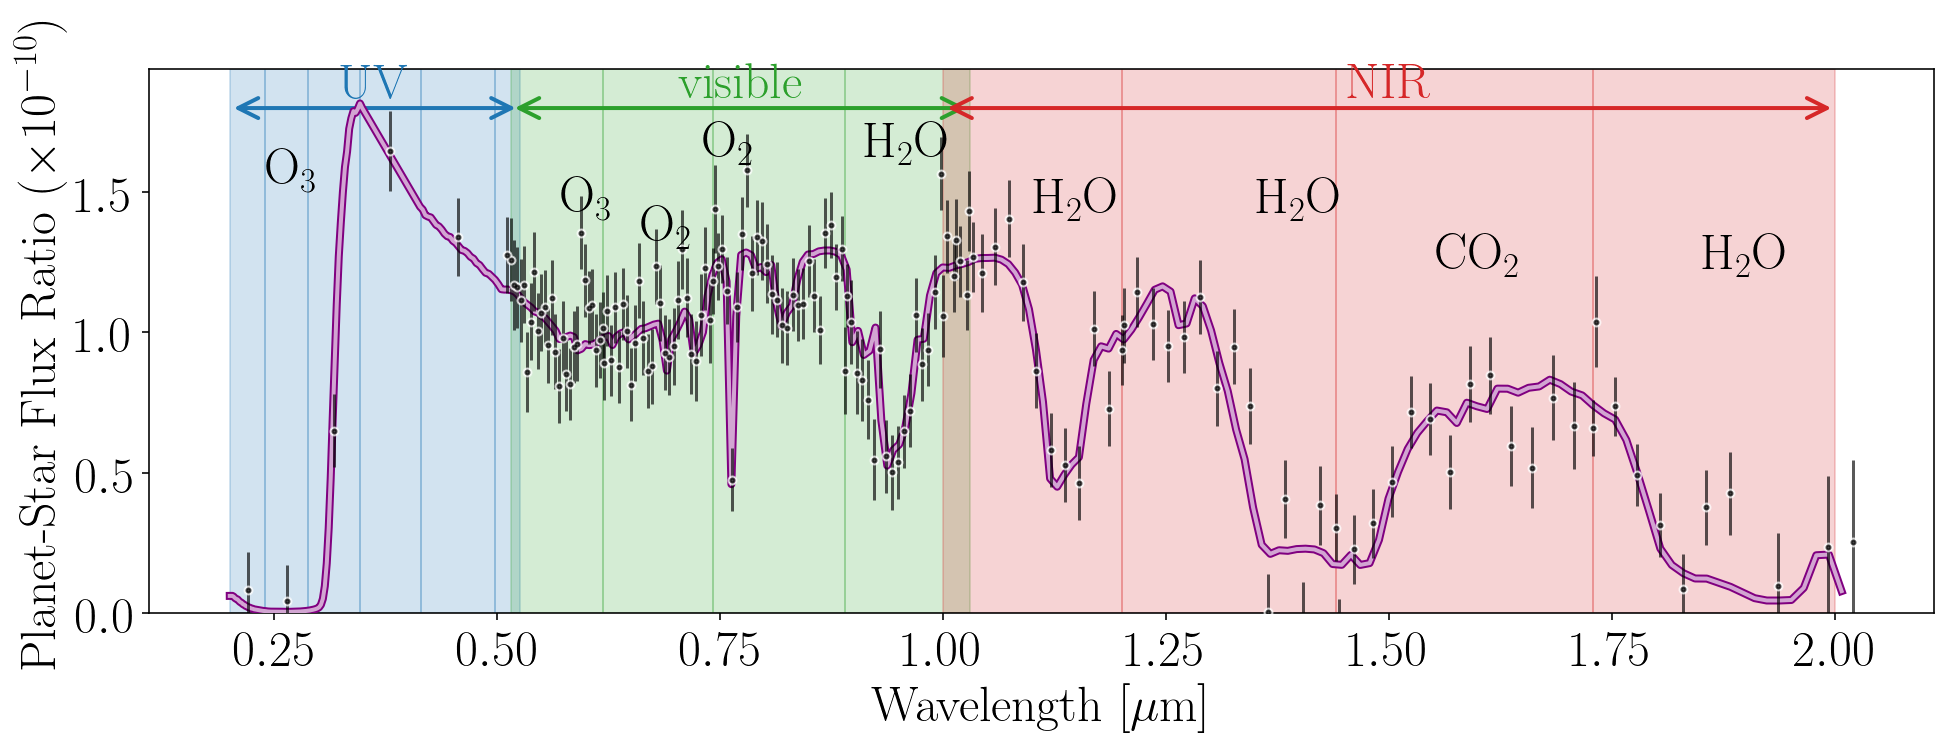

In [202]:
fig, ax = plot_observed_spectrum(drmx)

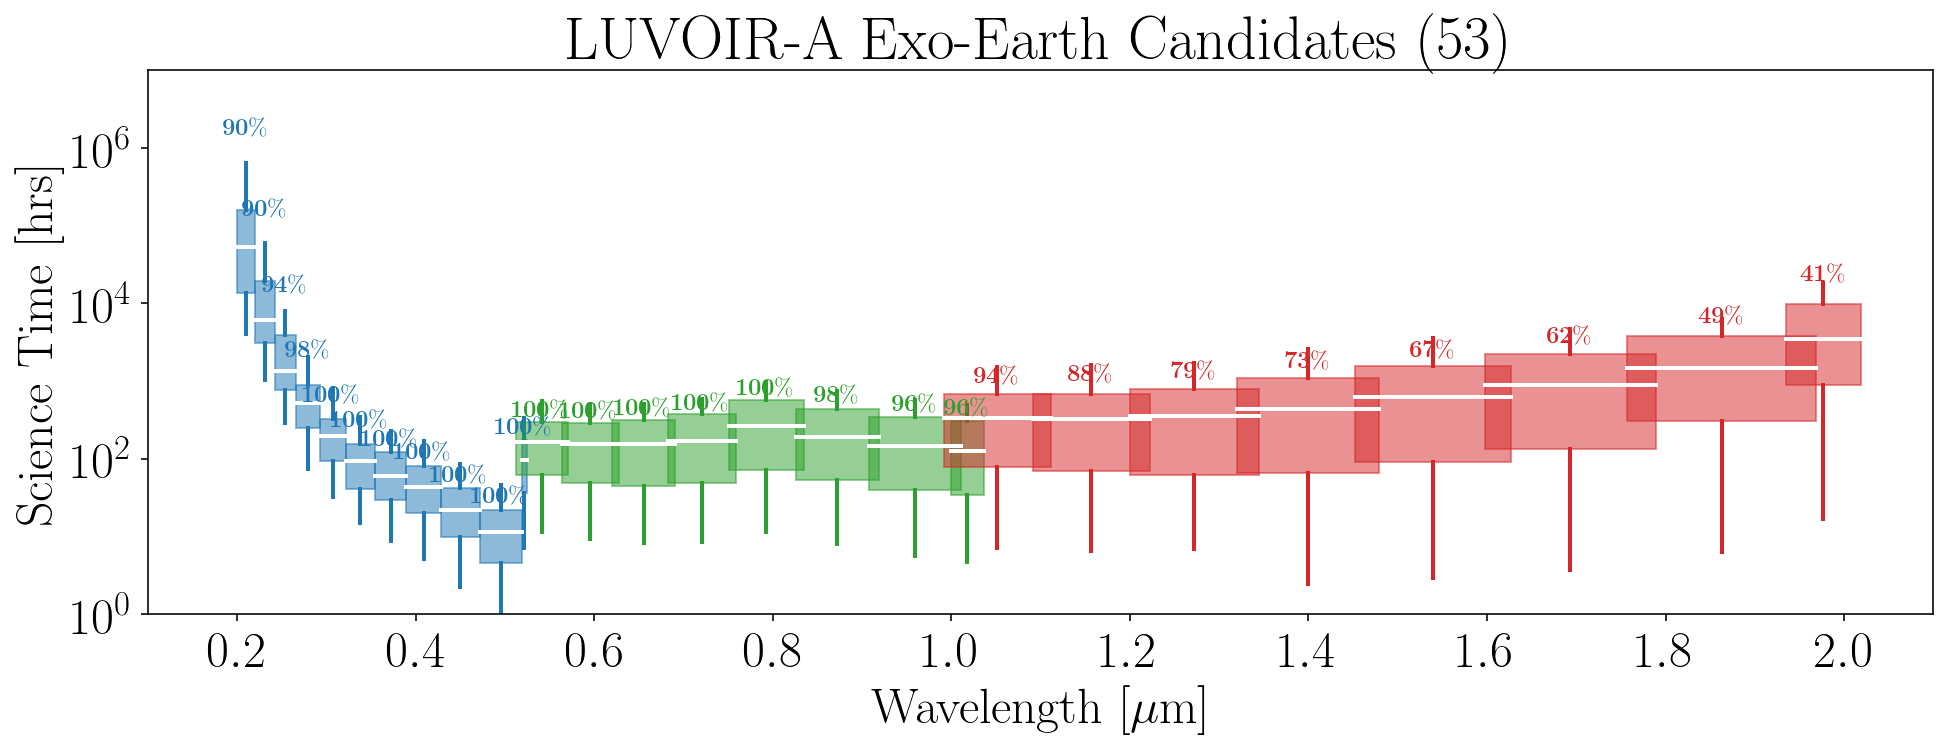

In [181]:
fig = plot_bp_exptimes(drmx, plot_spectrum = False, title = "LUVOIR-A Exo-Earth Candidates (%i)" %drmx.NBIAS)

## 20% Bandpasses

In [182]:
# Create LUVOIR DRM
drmx = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "A", 
    telescope_mods = {}
)

# Calculate table of exposure times
drmx.generate_exptime_table()

Text(0,1,'Total Exposure Time (days)')

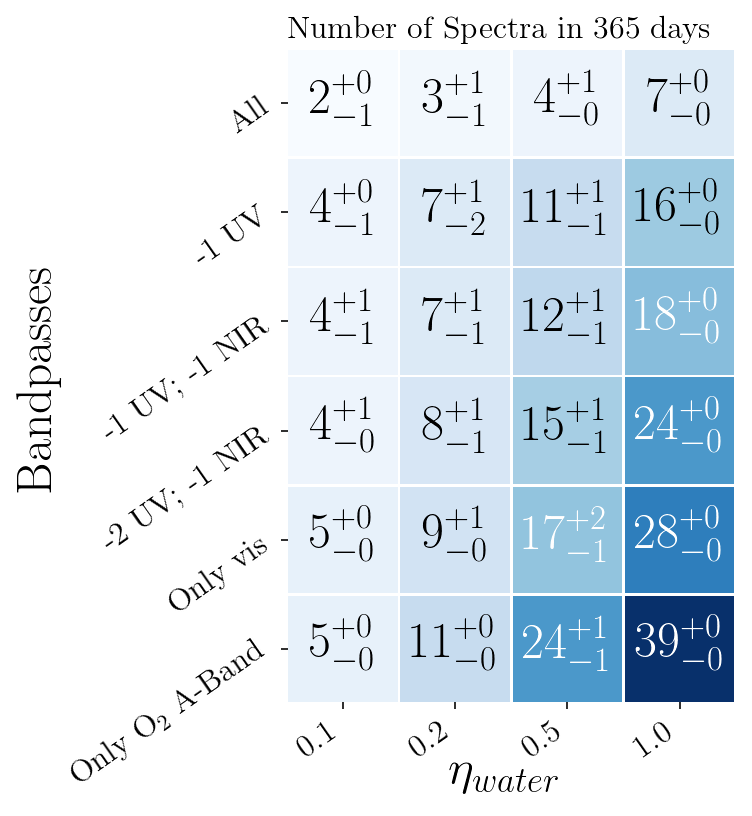

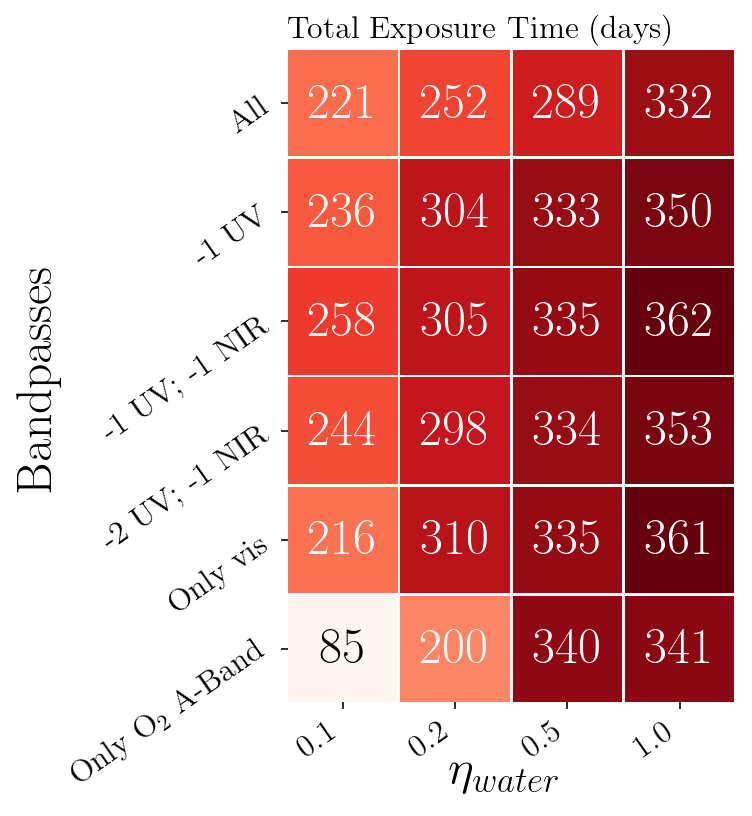

In [165]:
# Define cases 
ibp = np.arange(len(drmx.bp_names))
case_names = [
    "All", 
    "-1 UV", 
    "-1 UV; -1 NIR", 
    "-2 UV; -1 NIR", 
    "Only vis",
    r"Only O$_2$ A-Band"
]
cases = [
    get_iremove(drmx, Nremove_uv=0, Nremove_nir=0), 
    get_iremove(drmx, Nremove_uv=1, Nremove_nir=0), 
    get_iremove(drmx, Nremove_uv=1, Nremove_nir=1), 
    get_iremove(drmx, Nremove_uv=2, Nremove_nir=1), 
    ibp[(drmx.bp_chan == 0) | (drmx.bp_chan == 2)],
    ibp[(drmx.bandpasses[:,0] > 0.76) | (drmx.bandpasses[:,1] < 0.76)]
]

# Define eta range
Xdraw = 500
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(Ndraws), len(cases), 3))
t_scix = np.zeros((len(Ndraws), len(cases), 3))
t_ovrx = np.zeros((len(Ndraws), len(cases), 3))
countx = np.zeros((len(Ndraws), len(cases), 3))
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=drmx.wantexp)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m

# Make Table of results
fig, ax = ColorTable(etas, case_names, countx[:,:,0], fmt = "%i", data_pm = (countx[:,:,1], countx[:,:,2]), labelfontsize=16, labelrotation=35, 
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of Spectra in %i days" %drmx.wantexp, ha = "left", fontsize = 16, loc = "left")

fig, ax = ColorTable(etas, case_names, t_totx[:,:,0], fmt = "%i", labelfontsize=16, labelrotation=35, colormap = "Reds",
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01, textsize = 16)
                     #data_pm = (t_totx[:,:,1], t_totx[:,:,2]))
ax[0,0].set_title("Total Exposure Time (days)", ha = "left", fontsize = 16, loc = "left")

In [159]:
icase = 3

iremove = cases[icase]
iname = case_names[icase]

Xdraw = 200
Ndraws = np.arange(1,drmx.NBIAS)
wantdays = np.linspace(5, 365*2, 20)

zcube = np.zeros((len(Ndraws), len(wantdays), Xdraw))

np.random.seed(seed = None)

for i in range(len(Ndraws)):
    for j in range(len(wantdays)):
        for k in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], wantexp_days = wantdays[j], verbose = False, iremove = iremove) 
            zcube[i,j,k] = count_in_texp
            
zmean = np.mean(zcube, axis = 2)

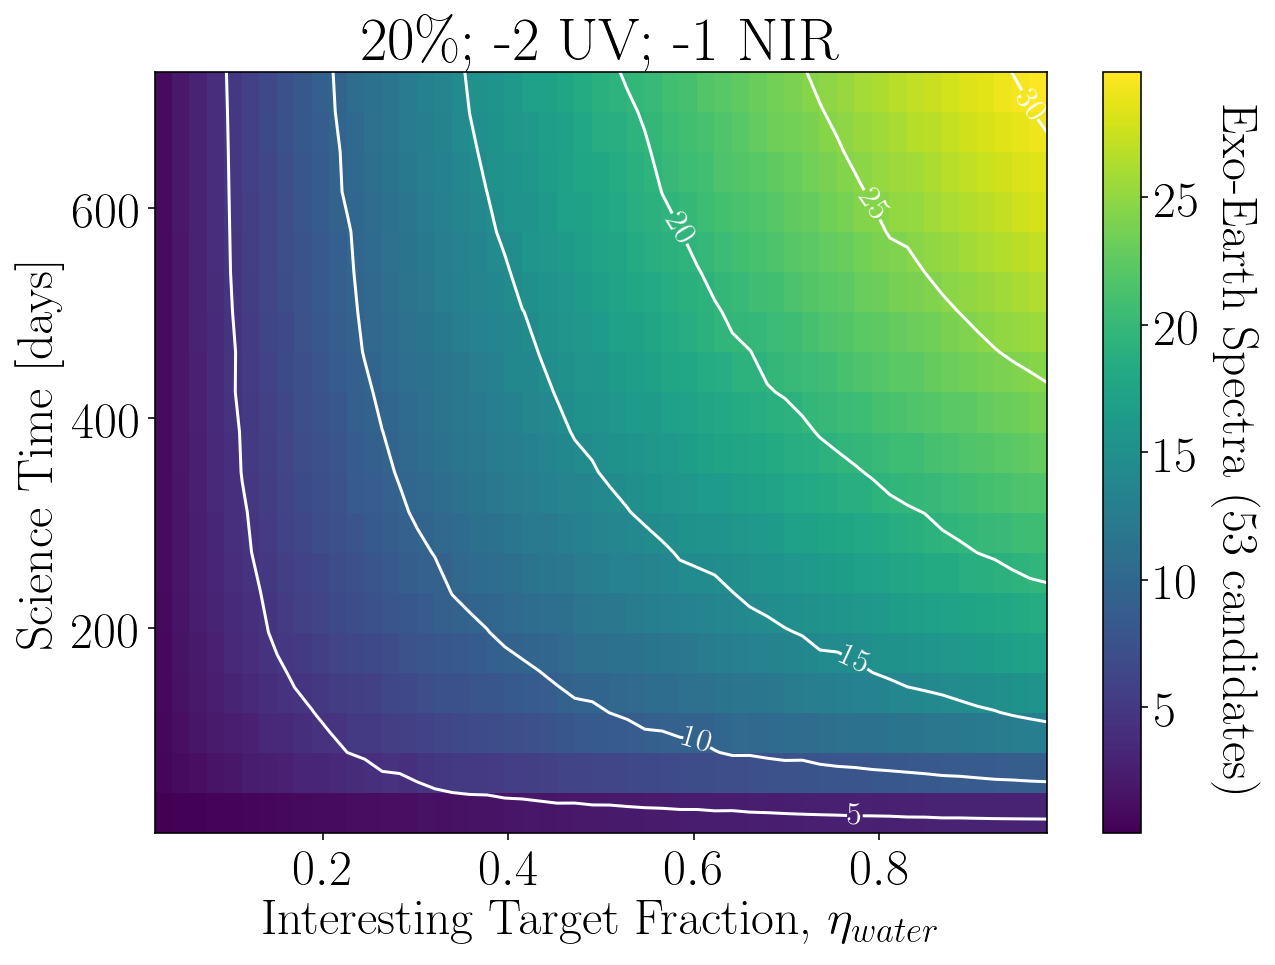

In [160]:
contour_intervals = 5.0
levels = list(np.arange(1, zmean.max() / contour_intervals) * contour_intervals)

fig, ax = plt.subplots(figsize = (10,7))
ax.set_title("%i total stars in sample" %drmx.NBIAS)
ax.set_title("%i\%%; %s" %(100*drmx.bandwidth, iname))
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Science Time [days]")
p = ax.pcolor(Ndraws / float(drmx.NBIAS), wantdays, zmean.T)
cln = ax.contour(Ndraws / float(drmx.NBIAS), wantdays, zmean.T, colors="w", levels = levels)
plt.clabel(cln, inline=1, fontsize=16, inline_spacing=1, fmt = "%i", rightside_up = True)
cbar = fig.colorbar(p)
cbar.set_label("Exo-Earth Spectra (%i candidates)" %drmx.NBIAS, rotation = 270, labelpad = 30)
p.set_rasterized(True)
#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_time_vs_eta_case4.pdf" %architecture, bbox_inches = "tight")

"""
zstd = np.std(zcube, axis = 2)

fig, ax = plt.subplots()
ax.set_title("%i total stars in sample" %drmx.NBIAS)
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Observing Time [days]")
p = ax.pcolor(Ndraws / float(drmx.NBIAS), wantdays, zstd.T)
fig.colorbar(p, label = "Std Num of Complete Spectra")
""";

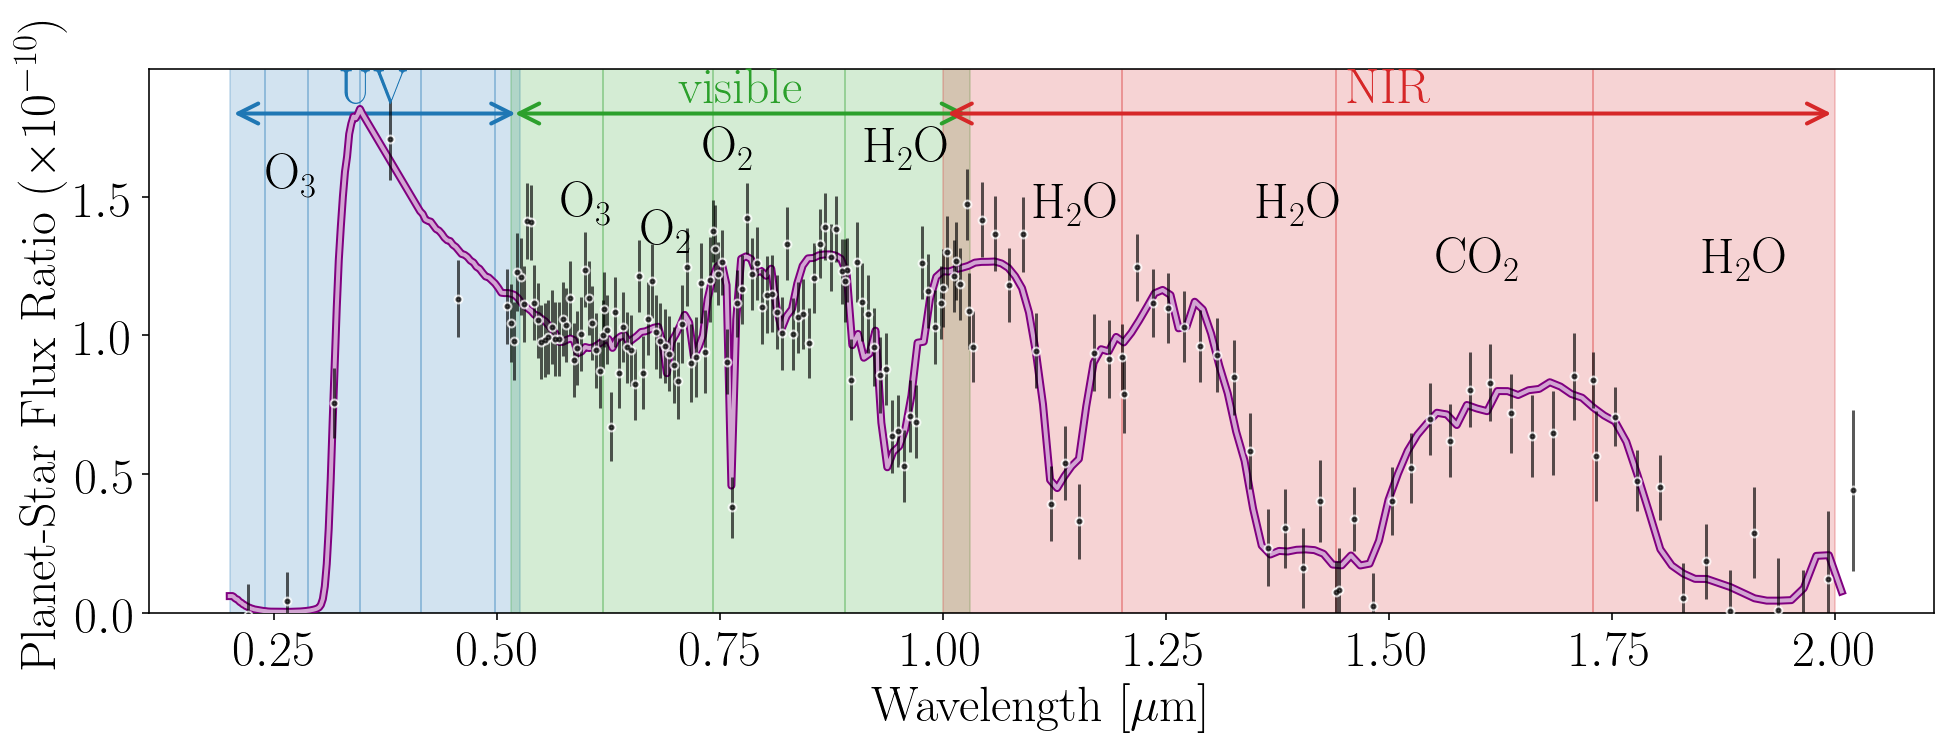

In [166]:
icase = 0

iremove = cases[icase]
cc = ["C0", "C2", "C3"]
bp_names = drmx.bp_names
plot_boxes = False

# Set planet and star parameters for an Earth-Sun analog at 5pc
drmx.cn.planet.distance = 6.0
drmx.cn.planet.a = 1.0
drmx.cn.star.Rs = 1.0
drmx.cn.star.Teff = 5780.

"""
wantSNR_grid = np.array([wantSNR for i in range(len(bp_names))])
wantSNR_grid[0] = 1.0
wantSNR_grid[1] = 1.0
"""

output = drmx.complete_spectrum_time()
spectrum = output[2]

fig, ax = plt.subplots(figsize = (16,5))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmx.bandpasses[i][0], drmx.bandpasses[i][1], alpha = 0.2, color = cc[drmx.bp_chan[i]])

drmx.cn.telescope.lammin = 0.2
drmx.cn.telescope.lammax = 2.0
drmx.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmx.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmx.cn.lam, 1e10*drmx.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmx.cn.lam, 1e10*drmx.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

# Label Molecules
ax.text(0.27, 1.55, "O$_3$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.6, 1.45, "O$_3$",   ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.69, 1.35, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.76, 1.65, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.96, 1.65, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.4, 1.45, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.9, 1.25, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.6, 1.25, "CO$_2$",  ha = "center", va = "center", color = "k", zorder = 130)

yloc = 1.8
lammin_inst = drmx.bandpasses[drmx.bp_chan == 0][0][0] 
lammax_inst = drmx.bandpasses[drmx.bp_chan == 0][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "UV"
color = cc[0]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmx.bandpasses[drmx.bp_chan == 1][0][0] 
lammax_inst = drmx.bandpasses[drmx.bp_chan == 1][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "visible"
color = cc[1]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmx.bandpasses[drmx.bp_chan == 2][0][0] 
lammax_inst = drmx.bandpasses[drmx.bp_chan == 2][-1][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "NIR"
color = cc[2]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

if plot_boxes:

    ax2 = ax.twinx()
    
    """
    Xdraw = len(tpbpcs_draws_tots[0][0])

    # Transform quantities for boxplot
    tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
    for i in range(Xdraw):
        for j in range(tp):
            for k in range(len(tpbpcs_draws_tots[j])):
                tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
    """

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):
        
        data = []
        positions = []
        widths = []
        
        for j in range(len(bp_names[bp_chan == ichan])):
                
            data.append(tmp[icount,:])
            positions.append(np.mean(spectrum[0][icount]))
            widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
            color1 = cc[ichan]

            comp_str = "$%i \%%$" %(100.*frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                     ha = "center", va = "top", fontsize = 12, color = color1)

            icount += 1

        positions = np.array(positions)
        widths = np.array(widths)
        bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                          boxprops = {"color" : color1, "alpha" : 0.5}, 
                          whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                          capprops = {"color" : color1, "linewidth" : 0.0}, 
                          medianprops = {"color" : "w", "linewidth" : 2.0}, 
                          patch_artist=True, positions = positions, whis = [5, 95]); 

        for patch in bp1['boxes']:
            patch.set_facecolor(color1)

    ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = 0.0)

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xlim(0.1, 2.0)
    #ax2.set_xlim(0.4, 1.0)

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_spectrum_SNR8.5_wide.pdf", bbox_inches = "tight")

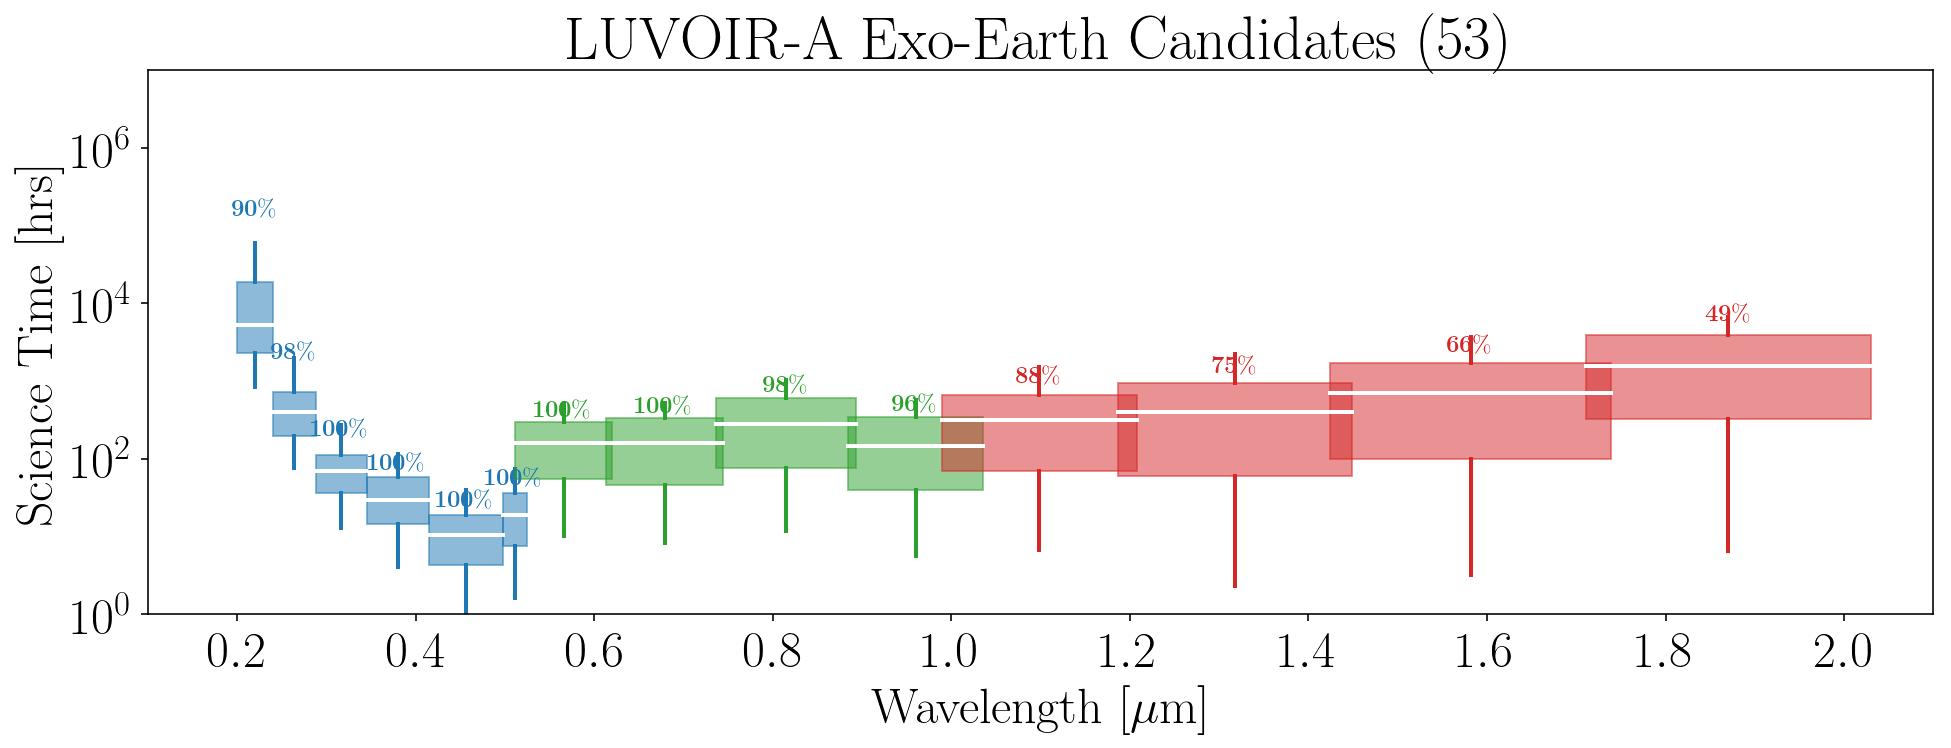

In [183]:
fig = plot_bp_exptimes(drmx, plot_spectrum = False, title = "LUVOIR-A Exo-Earth Candidates (%i)" %drmx.NBIAS)

In [193]:
drmx.exptime_table

,HIP,type,d [pc],UV 1,UV 2,UV 3,UV 4,UV 5,UV 6,vis 1,vis 2,vis 3,vis 4,NIR 1,NIR 2,NIR 3,NIR 4,Spec. Completeness
0,91772,K5,3.49174,4795.517824965829,75.73353763474026,6.3462790173350525,1.720068762812048,0.3819328392117149,0.5543561328159193,3.102920979635664,2.2914036519948295,2.8787579345547116,1.2889995547979307,0.9205597407736336,0.9315069755714868,1.2357242637754926,2.4024185417892148,1.0
1,8102,G8V,3.65017,nan,13.686116337416681,2.7254135148469625,1.1059591417647379,0.32824306743216625,0.5510146695788425,3.333782758654826,2.9813171027432204,4.318015826503313,2.1759176522792965,1.5301406018359995,1.725773609792996,2.5058206211671816,5.229663234076844,0.9782608695652174
2,85523,K5,4.5405,13307.690074663706,177.1110466235691,12.041609274395022,3.070540758432732,0.6672079929941587,0.9732329553664755,5.703126070002481,4.192129157201717,5.361640704165977,2.379442192394707,2.1813973334835133,2.269793862187854,3.13173114476341,6.43540063317844,1.0
3,99461,K2V,6.01504,5264.548226988776,124.59921859693902,12.736852605377115,4.00498060220363,1.0092487031848794,1.5966421392729795,10.148792548663488,8.295942165012518,11.740683448587141,5.512229556359268,6.5728940624166,7.47809522010468,11.23103183417392,25.032010105271706,1.0
4,12114,K3V,7.1803,19551.897543903164,331.00835816994066,24.228889972459097,6.649004894479273,1.5558278210305232,2.426393159887771,16.23737304168218,12.818969034145224,18.146065808883865,8.275970393974978,11.951161658936584,13.508864250800533,20.285919068098917,nan,0.8521739130434782
5,113283,K4Vp,7.60919,47381.83847109929,637.3368215649921,36.55267771766989,8.871874031425042,1.9321973925333003,2.94660978184302,19.988520633202633,15.16352315433122,21.029076459615702,9.354065925309811,14.003262263725892,15.506382638452564,22.91624983836494,nan,0.8521739130434782
6,32984,K3V,8.71004,41792.0222795433,654.9370293443433,41.58500324123637,10.728831622933507,2.4452999648469578,3.854985416322188,27.62170400847933,21.786697150131477,31.65547119684011,14.30960482739529,24.599162249639807,28.102203264411642,nan,nan,0.6956521739130435
7,57939,G8Vp,9.09174,3938.9349610565373,152.93253673714813,21.072668585978363,7.935092779114225,2.299750090916573,3.9757631815791203,28.37783744654804,25.95590866312797,41.535295894774144,20.550838223647226,35.43510005791853,44.247831758097554,72.35948814702235,174.1337413472838,1.0
8,61317,G0V,8.43953,418.08052088691386,53.34789261758467,13.781745083800958,6.9222948438121765,2.456616723162237,4.621099755692257,31.84046807374428,32.72254079467874,55.0586888882726,29.65745954296198,39.97463879643809,53.22270288236852,91.4886142875631,227.67908259419897,1.0
9,56997,G8Vvar,9.61169,4858.042325436398,181.58832505388867,24.20464642572932,9.036974072526847,2.611595750343327,4.530869475312212,32.92275584971977,30.17901159544433,48.733530604673476,24.074016431780365,43.6706550327392,54.71140646413482,89.77849193134827,nan,0.8521739130434782


In [189]:
drmx.cn.telescope.throughput

0.18

In [90]:
drmA.cn.planet.Nez

1.0

In [130]:
drmA.STARS

{u'dist': array([ 8.06842,  3.65017, 10.929  ,  7.1803 , 10.5407 , 13.7137 ,
         8.43953,  8.80204, 15.8328 ,  8.71004, 15.8932 , 17.4368 ,
        11.6455 ,  9.09174,  6.01504, 15.0128 , 11.0595 ,  3.49174,
        15.1149 ,  7.60919, 11.3688 , 12.4938 ,  4.5405 , 13.2767 ,
        16.7364 ,  9.61169, 11.1832 , 17.762  , 11.8217 , 18.2782 ,
        16.8719 , 18.2715 , 18.2349 , 21.2857 , 12.0322 , 20.8855 ,
        17.3671 , 22.8781 , 12.7779 , 15.5111 , 21.5008 , 18.3688 ,
        15.753  , 21.2585 , 15.1768 , 17.9115 , 17.3853 , 14.3266 ,
        15.2509 , 17.2354 , 20.2388 , 17.8731 , 18.8324 ]),
 u'hip': array([ 22449,   8102,  57757,  12114,  14632, 116771,  61317,  84720,
         71284,  32984,  77760,  76829,  23693,  57939,  99461,  47592,
          3093,  91772,   5862, 113283,  47080,  40693,  85523,  22263,
         82588,  56997,  42808,  57507,  69972, 109422, 116085,  40843,
         26394,  96895,  15371,  25110,  12653,  86620,  80337,  86796,
         51502,  48